<a href="https://colab.research.google.com/github/Raanank10/Instagram-s-influencers/blob/Eladk_20211002/Instagram_influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram_influencers**

# Global Parameters

In [307]:
path = 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/ai_posts_analysis_data.xlsx'
fname = 'ai_posts_analysis_data.xlsx'
# fname = 'https://github.com/Raanank10/Instagram-s-influencers/blob/ai_posts_analysis_data.xlsx'
# fname = 'https://github.com/Raanank10/Instagram-s-influencers/blob/main/ai_posts_analysis_data.xlsx'

path_part1= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part1.csv'
path_part2= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part2.csv'

train_size = 0.75
rand_state = 990
sigma = 3


In [308]:
# Bining
bin_labels=['Low','Medium','High', 'Very High','Extreme']

# Get the Data

In [309]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd
import missingno as msno

# SK Learn
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score , confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report # elad 20210708
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import OrdinalEncoder # elad 20210911

# Trees Visualization
import pydot
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Misc
import warnings
from sys import modules
from time import time
from platform import python_version

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# IPython
from IPython.display import Image, display

# Confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

In [310]:
df = pd.read_csv(path, index_col=0)  
df.head()

,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
1,,,,,,,,,,,,,,,,,,,,,,,,,,
1918,36193140327,elastici_e_passamaneria,Elastici e Passamaneria,1052,2530600951335029174,CMegChUlwm2,23,0,2.19,https://www.instagram.com/p/CMegChUlwm2,"Photo by Elastici e Passamaneria on March 16, 2021.",FFP2 MADE IN ITALY????????#ffp2mask#italianstyle#madeinitaly????????#produzionepropria#produttori#farmacie#farmacieitaliane#parafarmacia#mascherinelavabili#mask#ffp2,NaN,NaN,NaN,1615891163,"Clothing, Apparel, Text, Money, Collage, Advertisement, Poster",education,movies,business,https://instagram.fdok2-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/160374486_2823675294516254_158720847037227315_n.jpg?tp=1&_nc_ht=instagram.fdok2-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=fXOFeWEt3dcAX9moTcA&edm=ABfd0MgBAAAA&ccb=7-4&oh=cc36e9f840bc93314fcc9e76c9e4b8c6&oe=60DA4B27&_nc_sid=7bff83,no,no,no,NaN,NaN
1919,8210198494,pamela.latorre.73,Pamela La Torre,309,2595285287724490476,CQETjgBnZ7s,55,23,25.24,https://www.instagram.com/p/CQETjgBnZ7s,"Photo by Pamela La Torre on June 13, 2021. May be an image of one or more people, people standing and indoor.",Prima comunione Giorgio,Santissimo Crocifisso,"Taranto, Italy",NaN,1623602137,"Person, Human, Photographer, Photography, Photo, Furniture, Shoe, Clothing, Footwear, Apparel, Interior Design, Indoors",news,arts_entertainment,style_fashion,https://instagram.fhel3-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/131454075_203114518334788_1962979990399529842_n.jpg?tp=1&_nc_ht=instagram.fhel3-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=XmsE8bbC2cIAX-0rYFU&edm=ABfd0MgBAAAA&ccb=7-4&oh=4ca96de8a58eafc0ac1e2eea47d28236&oe=60D9DF1A&_nc_sid=7bff83,no,no,no,NaN,NaN
1920,36838177086,ilaria._004,????????????????,649,2356209223949454778,CCy784yAY26,138,2,21.57,https://www.instagram.com/p/CCy784yAY26,"Photo by ???????????????? on July 18, 2020. May be an image of 1 person.",mirame????,NaN,NaN,NaN,1595102049,"Clothing, Apparel, Person, Human, Female, Swimwear, Footwear, Woman, Bikini, Shoe, Skin, Pants, Flooring, Girl",education,arts_entertainment,style_fashion,https://instagram.fgua5-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.86.1080.1080a/s640x640/111218478_173463267523124_4585802501296990831_n.jpg?tp=1&_nc_ht=instagram.fgua5-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=3eLtxoYSgkUAX-UqCUh&edm=ABfd0MgBAAAA&ccb=7-4&oh=8ca65c0f03f5315391059b88e4879625&oe=60DAB7D9&_nc_sid=7bff83,no,no,no,NaN,NaN
1921,33286901341,wellbishstore,Wellbish Store,188,2462740031272344745,CItaQKiH1yp,6,0,3.19,https://www.instagram.com/p/CItaQKiH1yp,"Photo by Wellbish Store on December 12, 2020. May be an image of jewelry.",How sweet is your Heart? ❤️????\n.\n.\n???? Follow @wellbishstore\n???? Turn notification on\n☑️ Tag me in your stories\n???? click the link in my bio! ????\n.\n.\n#wellbishstore #relationship #love #boyfriend #girlfriend #bracelet #key #heart #jewelry #engagement #sweethearts,NaN,NaN,NaN,1607801511,"Pendant, Accessories, Accessory, Goggles",style_fashion,arts_entertainment,style_fashion,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/130800364_391796488911604_6608581821876444117_n.jpg?tp=1&_nc_ht=instagram.fhyd2-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=aNFdVzB8RNkAX-OmQYk&edm=ABfd0MgBAAAA&ccb=7-4&oh=d33040e44bb815f94e36b16550c6dbac&oe=60D955AB&_nc_sid=7bff83,no,no,no,NaN,NaN
1922,5633363536,amineblc,Mohamed Amine,1103,2127311663854320191,B2Fuq_ylPo_,46,4,4.53,https://www.instagram.com/p/B2Fuq_ylPo_,Photo by Mohamed Amine in Mawazine.,NaN,Mawazine,"Ksar Hellal, Tunisia",Tunisia,1567815333,"Clothing, Apparel, Person, Human, Sunglasses, Accessories, Accessory, Face, Scarf, Portrait, Photography, Photo, Glasses, People, Selfie, Female, Coat, Smile",NaN,news,style_fashion,https://ins

## Concate the 2 files: --Start

In [311]:
df_part1 = pd.read_csv(path_part1, index_col=0)  
df_part1.head(2)

,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
1,,,,,,,,,,,,,,,,,,,,,,,,,,
24897,47655063851,_color_pal_ette,Asty,17,2.660000e+18,CTegsqAhtEs,959,0,5641.18,https://www.instagram.com/p/CTegsqAhtEs,NaN,......(50:7)\n....\n#islam#quran#islamic#verse#quranverse#nature#subhanallah#muslim#reels#islamicreels#truth#mountains#ahmedalnufais#qiraat#reeloftheday#reelsinstagram#holyquran#mist,NaN,NaN,NaN,1630923941,"Vegetation, Plant, Nature, Rainforest, Outdoors, Land, Tree, Weather, Fog, Jungle, Painting, Art, Mist, Woodland, Forest, Bush, Landscape, Scenery",education,NaN,travel,https://scontent-hel3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.280.720.720a/s640x640/241390863_566725341049399_4464518408404712824_n.jpg?_nc_ht=scontent-hel3-1.cdninstagram.com&_nc_cat=107&_nc_ohc=ha3byVQANRAAX9uFuw8&edm=ABfd0MgBAAAA&ccb=7-4&oh=7b839f77160e3de879662df045a33628&oe=614DDB58&_nc_sid=7bff83,no,yes,yes,https://scontent-hel3-1.cdninstagram.com/v/t50.2886-16/241355135_2968650116724302_9211268511392989112_n.mp4?_nc_ht=scontent-hel3-1.cdninstagram.com&_nc_cat=102&_nc_ohc=lfaZh608M8YAX-ejoCg&edm=ABfd0MgBAAAA&ccb=7-4&oe=614DC35A&oh=d7c047911961f8e5a4e841daceb2dddc&_nc_sid=7bff83,1872.0
31286,47448521201,gigimakeup25,Gilliam Ibáñez ???????? makeup,157,2.660000e+18,CTsfWCeFunb,30,2147,1386.62,https://www.instagram.com/p/CTsfWCeFunb,"Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.","???????????????? ???? SORTEO ????????????\n participa Ahora y Gana \nUna Paleta de Sombras ( 32 Colores) + Set de Brochas Profesinales de ojos + OBSEQUIO Sorpresa.\n \nCómo Participar?\n???? Sigue nuestra cuenta en Instagram @gigimakeup25 \n???? Etiqueta a 3 Amigos ( No valen famosos , etc )\n???? Dejar un comentario con el hastang #quieroganar.\n\nPuedes participar hasta el 05/10/2021 Hasta las 23:59.\nEl 06/10/2021 se publicará el nombre del feliz Ganador o Ganadora.\nTe Apuntas! ,????????\nMucha Suerte",NaN,NaN,NaN,1631392946,"Flyer, Brochure, Advertisement, Poster, Paper, Text",entertainment,style_fashion,business,https://instagram.frix2-1.fna.fbcdn.net/v/t51.2885-15/e35/241739897_285537473018070_6208727686952352391_n.jpg?_nc_ht=instagram.frix2-1.fna.fbcdn.net&_nc_cat=106&_nc_ohc=VVj13OvSavsAX_jLTaF&edm=ABfd0MgBAAAA&ccb=7-4&oh=29790167523b714e288148d65d3d0ce1&oe=6151B61D&_nc_sid=7bff83,no,no,no,NaN,NaN


In [312]:
df_part2 = pd.read_csv(path_part2, index_col=0)  
df_part2.head(2)

,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
1,,,,,,,,,,,,,,,,,,,,,,,,,,
25807,40005237207,byeonggil6734,ç ‚å²¡????????????,717,2.550000e+18,CNfe10KrHnr,31,0,4.32,https://www.instagram.com/p/CNfe10KrHnr,"Photo by ç ‚å²¡???????????? on April 10, 2021. May be an image of 1 person, beard, sitting and indoor.",ì£¼ë§ì—ëŠ” í•˜ë£¨ ìˆ˜ê³ í–ˆìŠµë‹ˆë‹¤ ë¶€ì‚°ì—ì„œ,NaN,NaN,NaN,1618071572,"Chair, Furniture, Couch, Skin, Clothing, Apparel, Person, Human, Sitting, Cushion, Footwear, Indoors, Hat, Living Room, Room, Shoe, Armchair",education,arts_entertainment,style_fashion,https://instagram.fixb1-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/170910814_741739049702462_4206717608969572137_n.jpg?_nc_ht=instagram.fixb1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=a_5hpwC8mPsAX-S9s57&edm=ABfd0MgBAAAA&ccb=7-4&oh=7cbf9bf3791389688cdba4a7825ca78d&oe=6152D144&_nc_sid=7bff83,yes,no,no,NaN,NaN
27121,17931150200,hitmanmikey,mikey_BANGZ,6182,2.650000e+18,CS5ZWqFD3uv,242,25,4.32,https://www.instagram.com/p/CS5ZWqFD3uv,NaN,"(5-Step #Drill - #SubJazz Version)\n\n142 BPM in G Minor\n\nISRC# QZJUN2108076\n\nFor complete information regarding the production timeline of this instrumental, an electronic press kit or for writers/artists/visual content creators who desire custom created sound-beds to help you tell a story:\n\nofficial email: mikey@hitmanmikey.com\n\nUntagged Mastered .WAV & .MP3 Files / Stems and Customized Versions / Custom Requests available @:\n\nhttps://www.hitmanmikey.com/beat/mannastihl-9053229\n\n#instrumentals #",NaN,NaN,NaN,1629678866,"Poster, Advertisement, Symbol, Emblem, Logo, Trademark",arts_entertainment,NaN,business,https://instagram.fcvj4-1.fna.fbcdn.net/v/t51.2885-15/e15/240439053_577407736769807_3660906977618921919_n.jpg?_nc_ht=instagram.fcvj4-1.fna.fbcdn.net&_nc_cat=111&_nc_ohc=FMrS8eaM3c4AX_j7uZQ&edm=ABfd0MgBAAAA&ccb=7-4&oh=d1f706d41034056efc58ff0636f706d1&oe=614D92FF&_nc_sid=7bff83,no,yes,yes,https://instagram.fcvj4-1.fna.fbcdn.net/v/t50.2886-16/10000000_260626065677205_8633015125519467545_n.mp4?_nc_ht=instagram.fcvj4-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=9SPqvkLxzpcAX8oScWV&edm=ABfd0MgBAAAA&ccb=7-4&oe=614DFD4D&oh=de4d9725e550a279f140d3d260345122&_nc_sid=7bff83,3456.0


In [313]:
df = pd.concat([df_part1, df_part2])

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 24897 to 37857
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          36057 non-null  int64  
 1   USERNAME                        36057 non-null  object 
 2   FULLNAME                        34823 non-null  object 
 3   FOLLOWER                        36057 non-null  int64  
 4   POST ID                         36057 non-null  float64
 5   SHORTCODE                       36057 non-null  object 
 6   LIKES                           36057 non-null  int64  
 7   COMMENTS                        36057 non-null  int64  
 8   ENGAGEMENT                      36057 non-null  float64
 9   URL                             36057 non-null  object 
 10  ACCESSIBILITY CAPTION           29782 non-null  object 
 11  CAPTION                         30476 non-null  object 
 12  LOCATION                    

##Concate the 2 files: --> End

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 24897 to 37857
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          36057 non-null  int64  
 1   USERNAME                        36057 non-null  object 
 2   FULLNAME                        34823 non-null  object 
 3   FOLLOWER                        36057 non-null  int64  
 4   POST ID                         36057 non-null  float64
 5   SHORTCODE                       36057 non-null  object 
 6   LIKES                           36057 non-null  int64  
 7   COMMENTS                        36057 non-null  int64  
 8   ENGAGEMENT                      36057 non-null  float64
 9   URL                             36057 non-null  object 
 10  ACCESSIBILITY CAPTION           29782 non-null  object 
 11  CAPTION                         30476 non-null  object 
 12  LOCATION                    

# EDA

Column names: Replace white spaces with underscore 

In [316]:
df.columns = df.columns.str.replace(' ', '_')

Check for each column how many unique is there (lenght of the dataset 4792, len(df)) 

In [317]:
df.apply(lambda col: len(col.unique())).sort_values(ascending=False)

IMAGE_URL                         36057
URL                               35946
SHORTCODE                         35939
TIME                              35911
IMAGE_LABELS                      34482
CAPTION                           28978
ACCESSIBILITY_CAPTION             28038
VIDEO_URL                          5846
LOCATION                           4870
ENGAGEMENT                         3615
FULLNAME                           3504
USERNAME                           3489
USERID                             3489
CITY                               2733
FOLLOWER                           2032
VIDEO_VIEW_COUNT                   1583
LIKES                              1535
COMMENTS                            313
POST_ID                             230
COUNTRY                             121
CAPTION_INTEREST                     37
IMAGE_LABEL_INTEREST                 37
ACCESSIBILITY_CAPTION_INTEREST       31
COMMENT_DISABLED                      2
IS_VIDEO                              2


## Data Cleaning

In [318]:
# Descriptive statistics for each column
df.describe()

,USERID,FOLLOWER,POST_ID,LIKES,COMMENTS,ENGAGEMENT,TIME,VIDEO_VIEW_COUNT
count,3.605700e+04,3.605700e+04,3.605700e+04,3.605700e+04,36057.000000,36057.000000,3.605700e+04,5.847000e+03
mean,1.652492e+10,3.293115e+04,2.519427e+18,6.299581e+02,18.933161,8.498093,1.614549e+09,1.021531e+04
std,1.801686e+10,7.925535e+05,2.402581e+17,1.776770e+04,553.617212,34.940211,2.863973e+07,1.939191e+05
min,3.142160e+05,1.000000e+00,1.029034e+08,0.000000e+00,0.000000,0.000000,1.308680e+09,0.000000e+00
25%,1.503729e+09,2.790000e+02,2.510000e+18,1.200000e+01,0.000000,1.780000,1.613306e+09,5.100000e+01
50%,7.069489e+09,7.820000e+02,2.600000e+18,3.100000e+01,1.000000,4.550000,1.624265e+09,1.560000e+02
75%,3.456841e+10,2.177000e+03,2.650000e+18,8.300000e+01,6.000000,10.020000,1.630453e+09,4.985000e+02
max,4.974023e+10,3.636130e+07,2.670000e+18,1.409732e+06,73188.000000,5641.180000,1.632341e+09,9.785071e+06


In [319]:
df = df[df['ENGAGEMENT'].notna()]
print(f'data len = {len(df)}')

data len = 36057


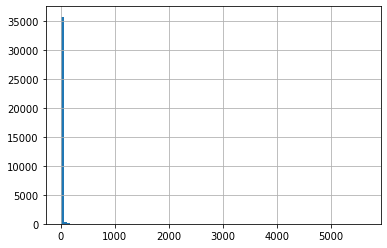

In [320]:
df.ENGAGEMENT.hist(bins=100)

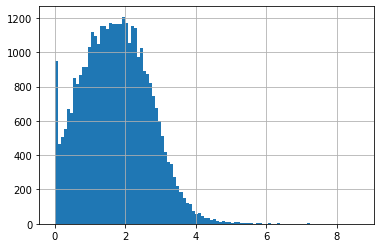

In [321]:
log_ENGAGEMENT = np.log1p(df.ENGAGEMENT)
log_ENGAGEMENT.hist(bins=100)

In [322]:
df['log_ENGAGEMENT'] = log_ENGAGEMENT

## Sigma cleaning

In [323]:
# # we lose the most viral posts and most unviral posts
# for col in df.columns:
#     if df[col].dtype == 'float64':
#         std = df[col].std()
#         ave = df[col].mean()
#         df = df.loc[df[col].between\
#                                (ave - (sigma * std), ave + (sigma * std))] 
#         print(f'Processing {col:10} --> {df.shape[0]:5} entities entries remain')

In [324]:
df.describe()

,USERID,FOLLOWER,POST_ID,LIKES,COMMENTS,ENGAGEMENT,TIME,VIDEO_VIEW_COUNT,log_ENGAGEMENT
count,3.605700e+04,3.605700e+04,3.605700e+04,3.605700e+04,36057.000000,36057.000000,3.605700e+04,5.847000e+03,36057.000000
mean,1.652492e+10,3.293115e+04,2.519427e+18,6.299581e+02,18.933161,8.498093,1.614549e+09,1.021531e+04,1.737679
std,1.801686e+10,7.925535e+05,2.402581e+17,1.776770e+04,553.617212,34.940211,2.863973e+07,1.939191e+05,0.946253
min,3.142160e+05,1.000000e+00,1.029034e+08,0.000000e+00,0.000000,0.000000,1.308680e+09,0.000000e+00,0.000000
25%,1.503729e+09,2.790000e+02,2.510000e+18,1.200000e+01,0.000000,1.780000,1.613306e+09,5.100000e+01,1.022451
50%,7.069489e+09,7.820000e+02,2.600000e+18,3.100000e+01,1.000000,4.550000,1.624265e+09,1.560000e+02,1.713798
75%,3.456841e+10,2.177000e+03,2.650000e+18,8.300000e+01,6.000000,10.020000,1.630453e+09,4.985000e+02,2.399712
max,4.974023e+10,3.636130e+07,2.670000e+18,1.409732e+06,73188.000000,5641.180000,1.632341e+09,9.785071e+06,8.638026


## Handle NaN valus

How Many NaN values are ther in the datast?

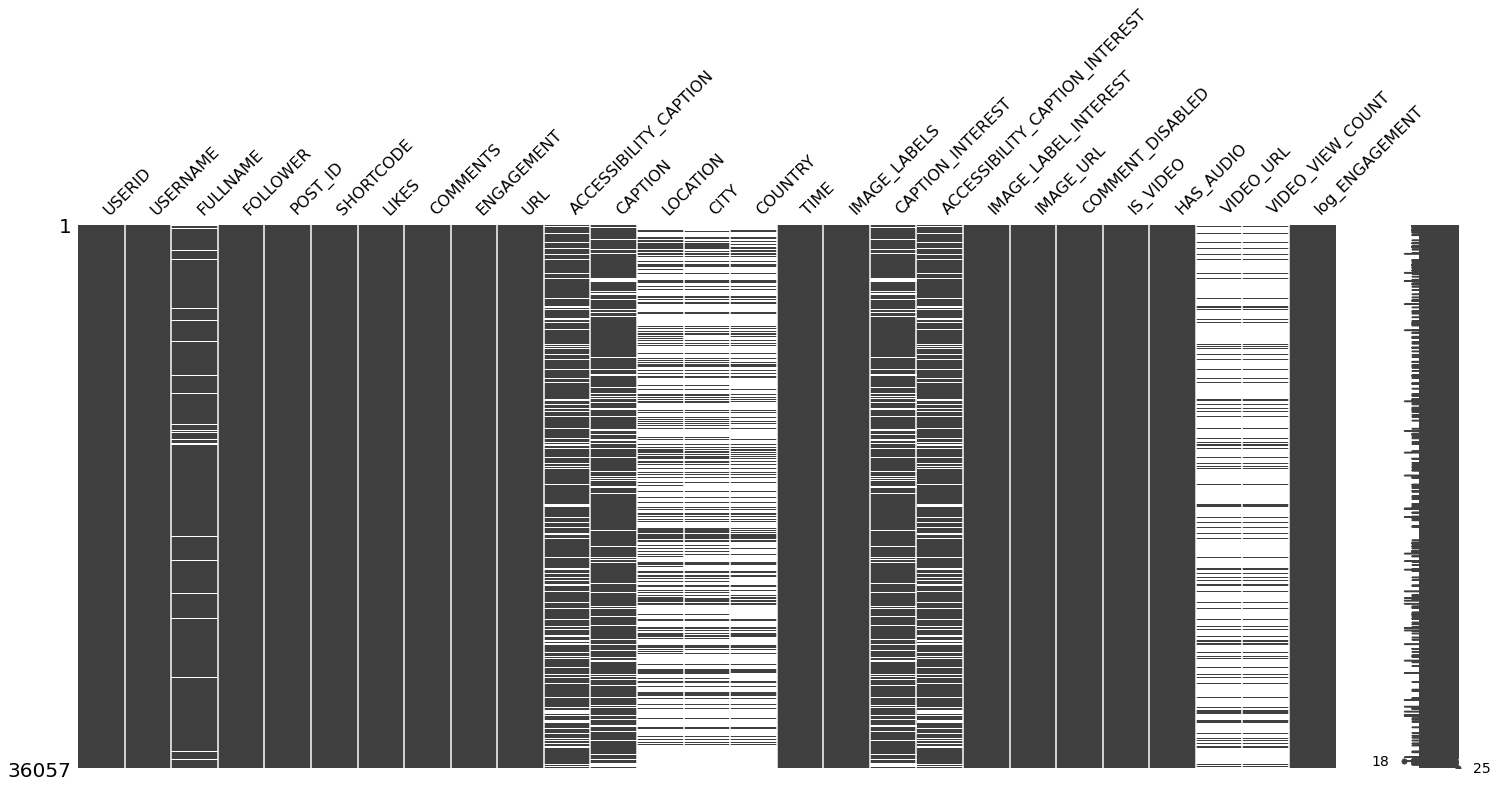

In [325]:
msno.matrix(df)

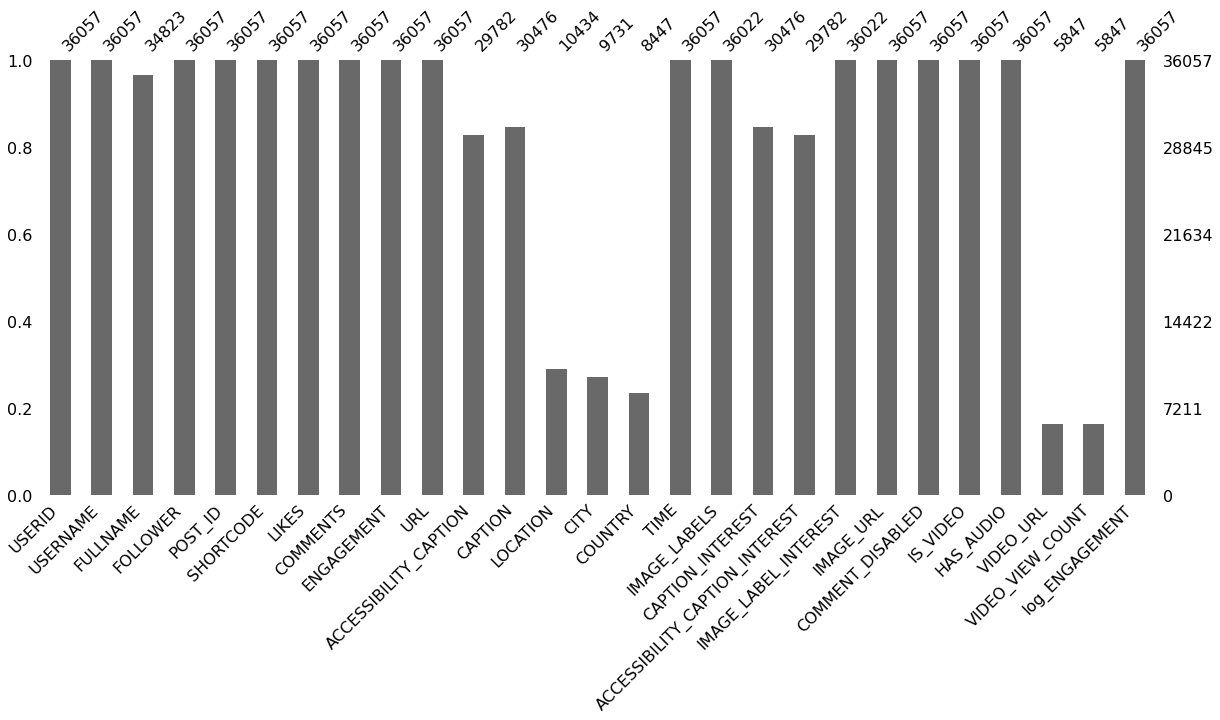

In [326]:
msno.bar(df, figsize=(20, 8))

Conert unix time to separate Date and Time columns

In [327]:
df['DATETIME'] = pd.to_datetime(df['TIME'],unit='s')

In [328]:
df['YEAR'] = pd.DatetimeIndex(df['DATETIME']).year
df['MONTH'] = pd.DatetimeIndex(df['DATETIME']).month
df['DAY'] = pd.DatetimeIndex(df['DATETIME']).day
df['DAYOFWEEK'] = pd.DatetimeIndex(df['DATETIME']).dayofweek
df['HOUR'] = pd.DatetimeIndex(df['DATETIME']).hour
df['MINUTE'] = pd.DatetimeIndex(df['DATETIME']).minute

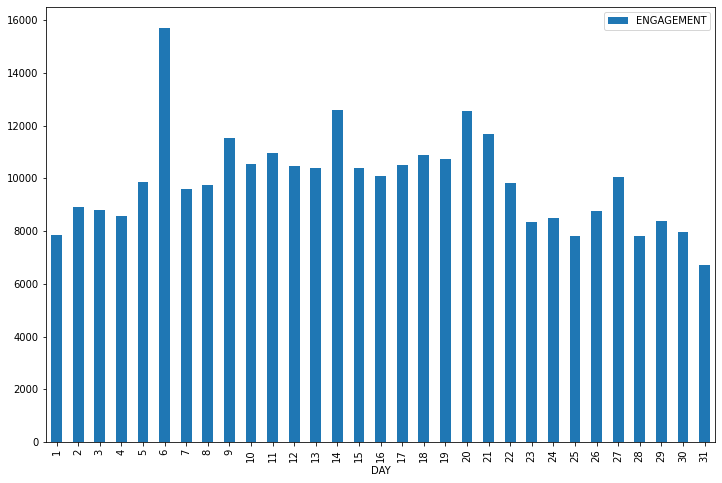

In [329]:
per_DAY = df.groupby(['DAY']).sum()
per_DAY.plot(y=["ENGAGEMENT"], kind="bar",figsize=(12,8))

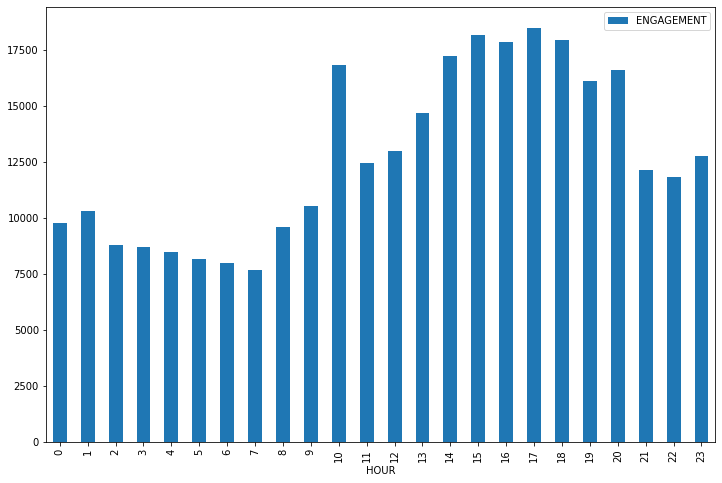

In [330]:
per_HOUR = df.groupby(['HOUR']).sum()
per_HOUR.plot(y=["ENGAGEMENT"], kind="bar",figsize=(12,8))

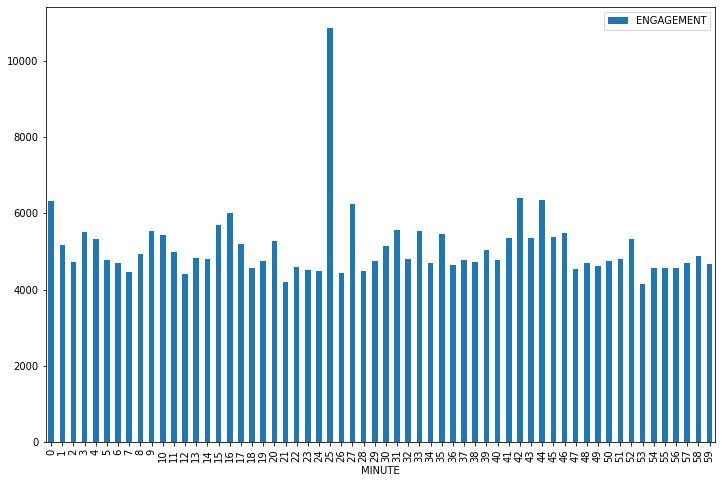

In [331]:
per_MINUTE = df.groupby(['MINUTE']).sum()
per_MINUTE.plot(y=["ENGAGEMENT"], kind="bar",figsize=(12,8))

In [332]:
# per_FULLNAME = df.groupby(['USERNAME']).sum()
# per_FULLNAME.plot(y=["ENGAGEMENT", "LIKES","COMMENTS"], kind="bar",figsize=(12,8))

# plt.title("Total ENGAGEMENT, LIKES, COMMENTS per state",fontsize=15)
# plt.xlabel('FULLNAME',fontsize=12)
# plt.ylabel('ENGAGEMENT, LIKES, COMMENTS',fontsize=12)

Remove column that all values are unique:

In [333]:
for col in df.columns:
    if len(df[col].unique()) == len(df):
        print(col)
        #df.drop(col,inplace=True,axis=1)

IMAGE_URL


In [334]:
df.head()

,USERID,USERNAME,FULLNAME,FOLLOWER,POST_ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,IMAGE_URL,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_URL,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24897,47655063851,_color_pal_ette,Asty,17,2.660000e+18,CTegsqAhtEs,959,0,5641.18,https://www.instagram.com/p/CTegsqAhtEs,NaN,......(50:7)\n....\n#islam#quran#islamic#verse#quranverse#nature#subhanallah#muslim#reels#islamicreels#truth#mountains#ahmedalnufais#qiraat#reeloftheday#reelsinstagram#holyquran#mist,NaN,NaN,NaN,1630923941,"Vegetation, Plant, Nature, Rainforest, Outdoors, Land, Tree, Weather, Fog, Jungle, Painting, Art, Mist, Woodland, Forest, Bush, Landscape, Scenery",education,NaN,travel,https://scontent-hel3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.280.720.720a/s640x640/241390863_566725341049399_4464518408404712824_n.jpg?_nc_ht=scontent-hel3-1.cdninstagram.com&_nc_cat=107&_nc_ohc=ha3byVQANRAAX9uFuw8&edm=ABfd0MgBAAAA&ccb=7-4&oh=7b839f77160e3de879662df045a33628&oe=614DDB58&_nc_sid=7bff83,no,yes,yes,https://scontent-hel3-1.cdninstagram.com/v/t50.2886-16/241355135_2968650116724302_9211268511392989112_n.mp4?_nc_ht=scontent-hel3-1.cdninstagram.com&_nc_cat=102&_nc_ohc=lfaZh608M8YAX-ejoCg&edm=ABfd0MgBAAAA&ccb=7-4&oe=614DC35A&oh=d7c047911961f8e5a4e841daceb2dddc&_nc_sid=7bff83,1872.0,8.638026,2021-09-06 10:25:41,2021,9,6,0,10,25
31286,47448521201,gigimakeup25,Gilliam Ibáñez ???????? makeup,157,2.660000e+18,CTsfWCeFunb,30,2147,1386.62,https://www.instagram.com/p/CTsfWCeFunb,"Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.","???????????????? ???? SORTEO ????????????\n participa Ahora y Gana \nUna Paleta de Sombras ( 32 Colores) + Set de Brochas Profesinales de ojos + OBSEQUIO Sorpresa.\n \nCómo Participar?\n???? Sigue nuestra cuenta en Instagram @gigimakeup25 \n???? Etiqueta a 3 Amigos ( No valen famosos , etc )\n???? Dejar un comentario con el hastang #quieroganar.\n\nPuedes participar hasta el 05/10/2021 Hasta las 23:59.\nEl 06/10/2021 se publicará el nombre del feliz Ganador o Ganadora.\nTe Apuntas! ,????????\nMucha Suerte",NaN,NaN,NaN,1631392946,"Flyer, Brochure, Advertisement, Poster, Paper, Text",entertainment,style_fashion,business,https://instagram.frix2-1.fna.fbcdn.net/v/t51.2885-15/e35/241739897_285537473018070_6208727686952352391_n.jpg?_nc_ht=instagram.frix2-1.fna.fbcdn.net&_nc_cat=106&_nc_ohc=VVj13OvSavsAX_jLTaF&edm=ABfd0MgBAAAA&ccb=7-4&oh=29790167523b714e288148d65d3d0ce1&oe=6151B61D&_nc_sid=7bff83,no,no,no,NaN,NaN,7.235345,2021-09-11 20:42:26,2021,9,11,5,20,42
37738,2720304702,bingham.daniel,Dan Bingham,285,2.640000e+18,CSW3-cVj476,3825,9,1345.26,https://www.instagram.com/p/CSW3-cVj476,NaN,@doug_44mtb @james_bettess,NaN,NaN,NaN,1628520240,"Path, Person, Human, Wood, Vegetation, Plant, Nature, Trail, Transportation, Tree",education,NaN,travel,https://instagram.fewr1-5.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.280.720.720a/s640x640/234517255_858765265045242_1454688539989933362_n.jpg?_nc_ht=instagram.fewr1-5.fna.fbcdn.net&_nc_cat=106&_nc_ohc=w-Q8wrfpMPgAX-cxiNp&edm=ABfd0MgBAAAA&ccb=7-4&oh=6d42c3d6f72ba7e11122027857af1132&oe=614DE8D2&_nc_sid=7bff83,no,yes,yes,https://instagram.fewr1-6.fna.fbcdn.net/v/t50.2886-16/233188263_523634272202508_6243638748233873249_n.mp4?_nc_ht=instagram.fewr1-6.fna.fbcdn.net&_nc_cat=100&_nc_ohc=idwZC3DYvOwAX-1PBGe&edm=ABfd0MgBAAAA&ccb=7-4&oe=614DA6F6&oh=58f4322b6468603380df51df2b66a8ee&_nc_sid=7bff83,64971.0,7.205086,2021-08-09 14:44:00,2021,8,9,0,14,44
26000,5837017557,syed_zehra01,syed zehra❤❤,357,1.590000e+18,BYZVVcCHOn7,3321,16,934.73,https://www.instagram.com/p/BYZVVcCHOn7,"Photo by syed zehra❤❤ on August 29, 2017.",NaN,NaN,NaN,NaN,1504048629,"Text, Poster, Advertisement, Flyer, Brochure, Paper, Face",NaN,arts_entertainment,business,https://insta

In [335]:
df.URL.head()
# SHORTCODE
# URL
# IMAGE_URL
# VIDEO_URL # Not working

1
24897    https://www.instagram.com/p/CTegsqAhtEs
31286    https://www.instagram.com/p/CTsfWCeFunb
37738    https://www.instagram.com/p/CSW3-cVj476
26000    https://www.instagram.com/p/BYZVVcCHOn7
25853    https://www.instagram.com/p/BjEoUkTjqNe
Name: URL, dtype: object

## Remove unneccessary columns from Dataframe

In [336]:
df.drop(['POST_ID','VIDEO_URL','SHORTCODE','IMAGE_URL','USERID','FULLNAME'],inplace=True,axis=1)

After talking with Royi on 1-Oct: 

In [337]:
df.drop(['URL'],inplace=True,axis=1)

In [338]:
#df.drop(['VIDEO_VIEW_COUNT'],inplace=True,axis=1)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 24897 to 37857
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   USERNAME                        36057 non-null  object        
 1   FOLLOWER                        36057 non-null  int64         
 2   LIKES                           36057 non-null  int64         
 3   COMMENTS                        36057 non-null  int64         
 4   ENGAGEMENT                      36057 non-null  float64       
 5   ACCESSIBILITY_CAPTION           29782 non-null  object        
 6   CAPTION                         30476 non-null  object        
 7   LOCATION                        10434 non-null  object        
 8   CITY                            9731 non-null   object        
 9   COUNTRY                         8447 non-null   object        
 10  TIME                            36057 non-null  int64         
 11

Convert columns type to characters :

In [340]:
df['COMMENT_DISABLED'].value_counts()

no     35855
yes      202
Name: COMMENT_DISABLED, dtype: int64

In [341]:
df['COMMENT_DISABLED'] = df['COMMENT_DISABLED'].map(dict(yes=1, no=0))

In [342]:
df['IS_VIDEO'] = df['IS_VIDEO'].map(dict(yes=1, no=0))

In [343]:
df['HAS_AUDIO'] = df['HAS_AUDIO'].map(dict(yes=1, no=0))

In [344]:
df[['COMMENT_DISABLED','IS_VIDEO','HAS_AUDIO']].value_counts()

COMMENT_DISABLED  IS_VIDEO  HAS_AUDIO
0                 0         0            30043
                  1         1             5411
                            0              401
1                 0         0              167
                  1         1               29
                            0                6
dtype: int64

In [345]:
pd.unique(df[['COMMENT_DISABLED','IS_VIDEO','HAS_AUDIO']].values.ravel('K'))

array([0, 1])

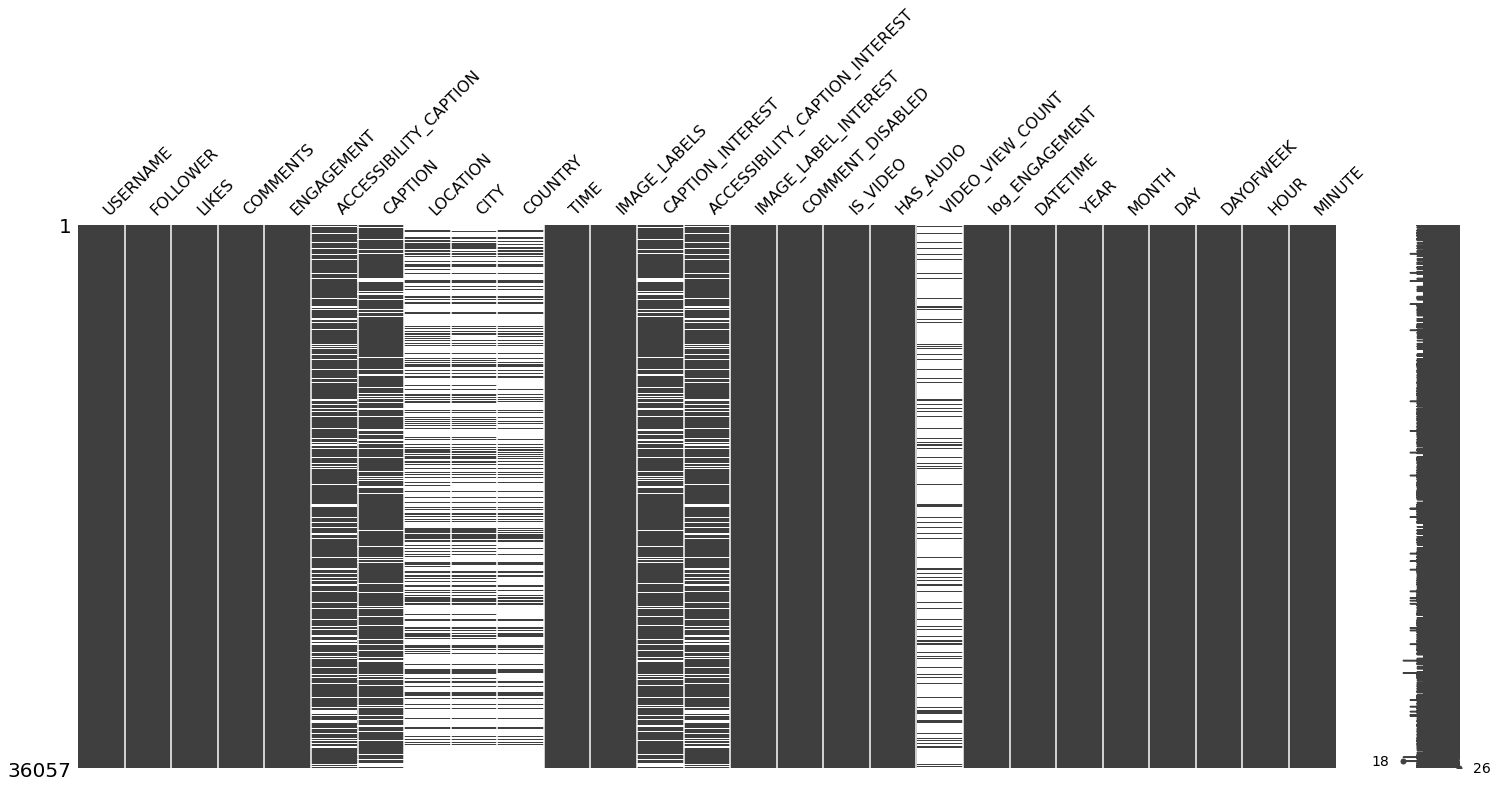

In [346]:
msno.matrix(df)

In [347]:
df.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT',
       'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'log_ENGAGEMENT', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK',
       'HOUR', 'MINUTE'],
      dtype='object')

Raname the index

In [348]:
df = df.rename_axis('LINE_NUM_INDEX')

Note by Eladk: we can fill location values by using a merdiction model base in the influancer and the time for the post. <BR> 
For Now, I'll just fill the columns with NULL

Replace all cases where VIDEO_VIEW_COUNT == Nan with 0. <BR> for double check i verified it with is_video column

In [349]:
df['VIDEO_VIEW_COUNT'].fillna(0, inplace=True)

Eladk note 8-Sep-2021: I still need to handle missing values in column:


*   FULLNAME
*   ACCESSIBILITY_CAPTION - specify full name, time, location, video or picture and tag
*   CAPTION - the text on this post (by the post uploader
*   LOCATION, CITY, COUNTRY - location
*   CAPTION_INTEREST -
*   ACCESSIBILITY_CAPTION_INTEREST


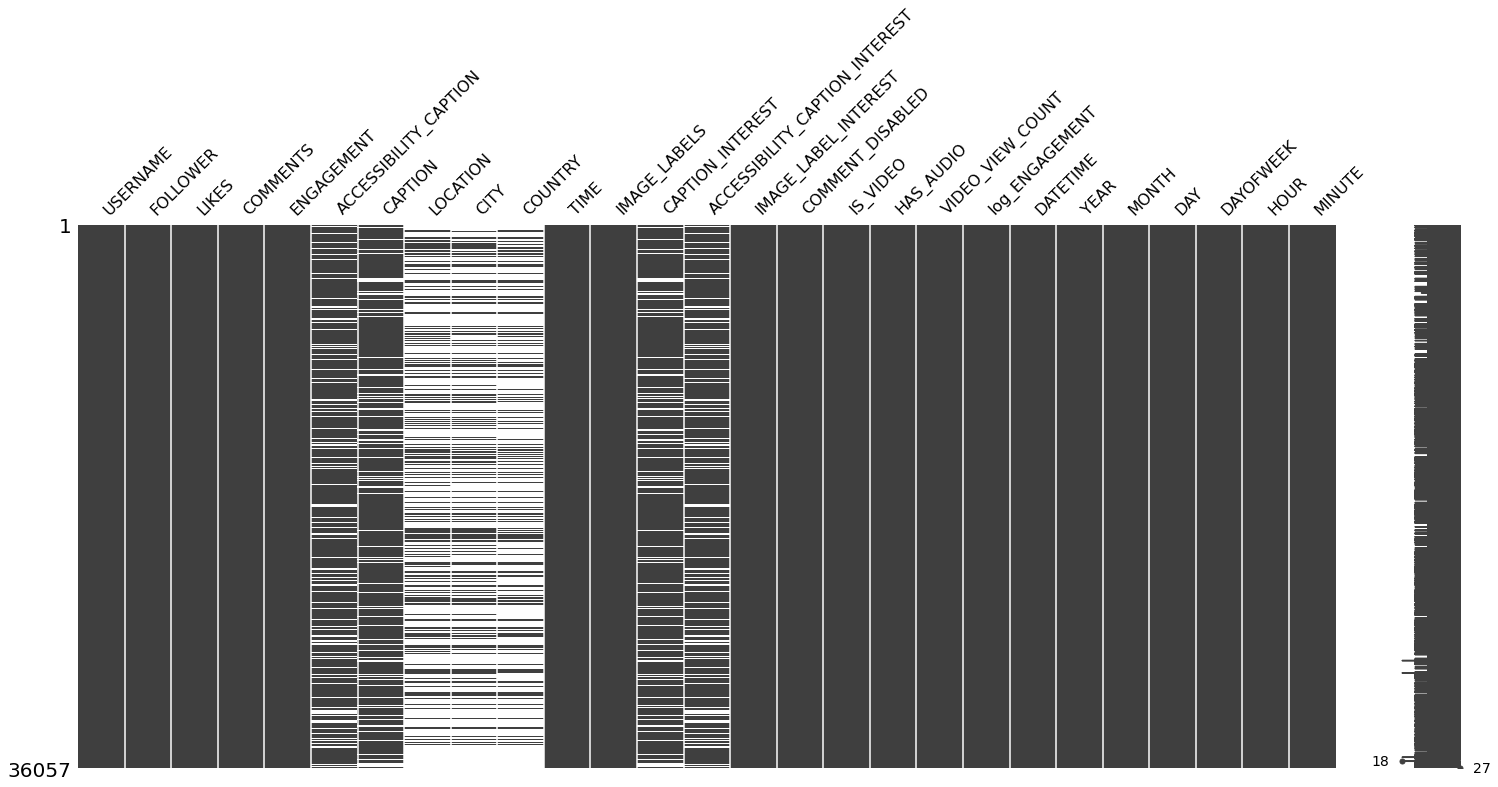

In [350]:
msno.matrix(df)

In [351]:
df.CAPTION.value_counts().sort_values(ascending=False)

????                                                                                                                                                                                                                                                                                                                                                                                                                                           329
????????                                                                                                                                                                                                                                                                                                                                                                                                                                       148
????????????                                                                                                                      

selecting a subset of the data:

In [352]:
df[['ACCESSIBILITY_CAPTION','CAPTION','LOCATION', 'CITY', 'COUNTRY'\
    ,'CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']].head(5)

,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,,,,,,
24897,NaN,......(50:7)\n....\n#islam#quran#islamic#verse#quranverse#nature#subhanallah#muslim#reels#islamicreels#truth#mountains#ahmedalnufais#qiraat#reeloftheday#reelsinstagram#holyquran#mist,NaN,NaN,NaN,education,NaN
31286,"Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.","???????????????? ???? SORTEO ????????????\n participa Ahora y Gana \nUna Paleta de Sombras ( 32 Colores) + Set de Brochas Profesinales de ojos + OBSEQUIO Sorpresa.\n \nCómo Participar?\n???? Sigue nuestra cuenta en Instagram @gigimakeup25 \n???? Etiqueta a 3 Amigos ( No valen famosos , etc )\n???? Dejar un comentario con el hastang #quieroganar.\n\nPuedes participar hasta el 05/10/2021 Hasta las 23:59.\nEl 06/10/2021 se publicará el nombre del feliz Ganador o Ganadora.\nTe Apuntas! ,????????\nMucha Suerte",NaN,NaN,NaN,entertainment,style_fashion
37738,NaN,@doug_44mtb @james_bettess,NaN,NaN,NaN,education,NaN
26000,"Photo by syed zehra❤❤ on August 29, 2017.",NaN,NaN,NaN,NaN,NaN,arts_entertainment
25853,"Photo by Fake Fake on May 22, 2018.",NaN,NaN,NaN,NaN,NaN,news


Increase the length to a column so that we'll see all the text in a cell

In [353]:
pd.options.display.max_colwidth = 1000
df.ACCESSIBILITY_CAPTION.head(5)

LINE_NUM_INDEX
24897                                                                                                      NaN
31286    Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.
37738                                                                                                      NaN
26000                                                                Photo by syed zehra❤❤ on August 29, 2017.
25853                                                                      Photo by Fake Fake on May 22, 2018.
Name: ACCESSIBILITY_CAPTION, dtype: object

Selecting 1 row by index (specific column only)

In [355]:
#df[df.index == 1929][['URL','ACCESSIBILITY_CAPTION','DATETIME','LOCATION']] # name, 
df[df.index == 1929][['ACCESSIBILITY_CAPTION','DATETIME','LOCATION']] # name, 

,ACCESSIBILITY_CAPTION,DATETIME,LOCATION
LINE_NUM_INDEX,,,
1929,"Photo by V i t t o r i a C a r o n in Palermo, Italy with @federico_alberti_. May be an image of 2 people, outerwear and monument.",2020-11-22 11:44:52,"Palermo, Italy"


In [356]:
df.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT',
       'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'log_ENGAGEMENT', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK',
       'HOUR', 'MINUTE'],
      dtype='object')

In [357]:
df[['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']].head(20)

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,
24897,education,NaN
31286,entertainment,style_fashion
37738,education,NaN
26000,NaN,arts_entertainment
25853,NaN,news
26348,parenting,arts_entertainment
19183,NaN,arts_entertainment
26156,NaN,travel
34625,NaN,travel


In [358]:
#df[df.index == 1932][['URL','CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']] # name, 
df[df.index == 1932][['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']] # name,

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,
1932,desserts_baking,travel


there are 308 combination as CAPTION_INTEREST and ACCESSIBILITY_CAPTION_INTEREST

In [359]:
df.groupby(['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,counts
0,arts_entertainment,arts_entertainment,1751
1,parenting,arts_entertainment,1583
2,education,arts_entertainment,1552
3,parenting,travel,795
4,arts_entertainment,travel,743
5,style_fashion,arts_entertainment,692
6,dating_and_relationships,arts_entertainment,614
7,food_drink,arts_entertainment,589
8,travel,arts_entertainment,563
9,music,arts_entertainment,541


there are 35 unique CAPTION_INTEREST


In [360]:
df.groupby(['CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

,CAPTION_INTEREST,counts
0,arts_entertainment,5178
1,parenting,4630
2,education,3509
3,style_fashion,2158
4,food_drink,1868
5,dating_and_relationships,1794
6,music,1745
7,travel,1709
8,humor,1351
9,pets,994


there are 26 unique ACCESSIBILITY_CAPTION_INTEREST


In [361]:
df.groupby(['ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(30)

,ACCESSIBILITY_CAPTION_INTEREST,counts
0,arts_entertainment,13143
1,travel,5055
2,style_fashion,2629
3,food_drink,1640
4,music,1210
5,parenting,1168
6,events,1012
7,movies,916
8,pets,571
9,news,335


Eladk 1-Oct , creat new column the state if CAPTION_INTEREST == ACCESSIBILITY_CAPTION_INTEREST

In [ ]:
df.groupby(['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

For Now (Eladk 2021-Sep-11) I'll fill every NaN with Null

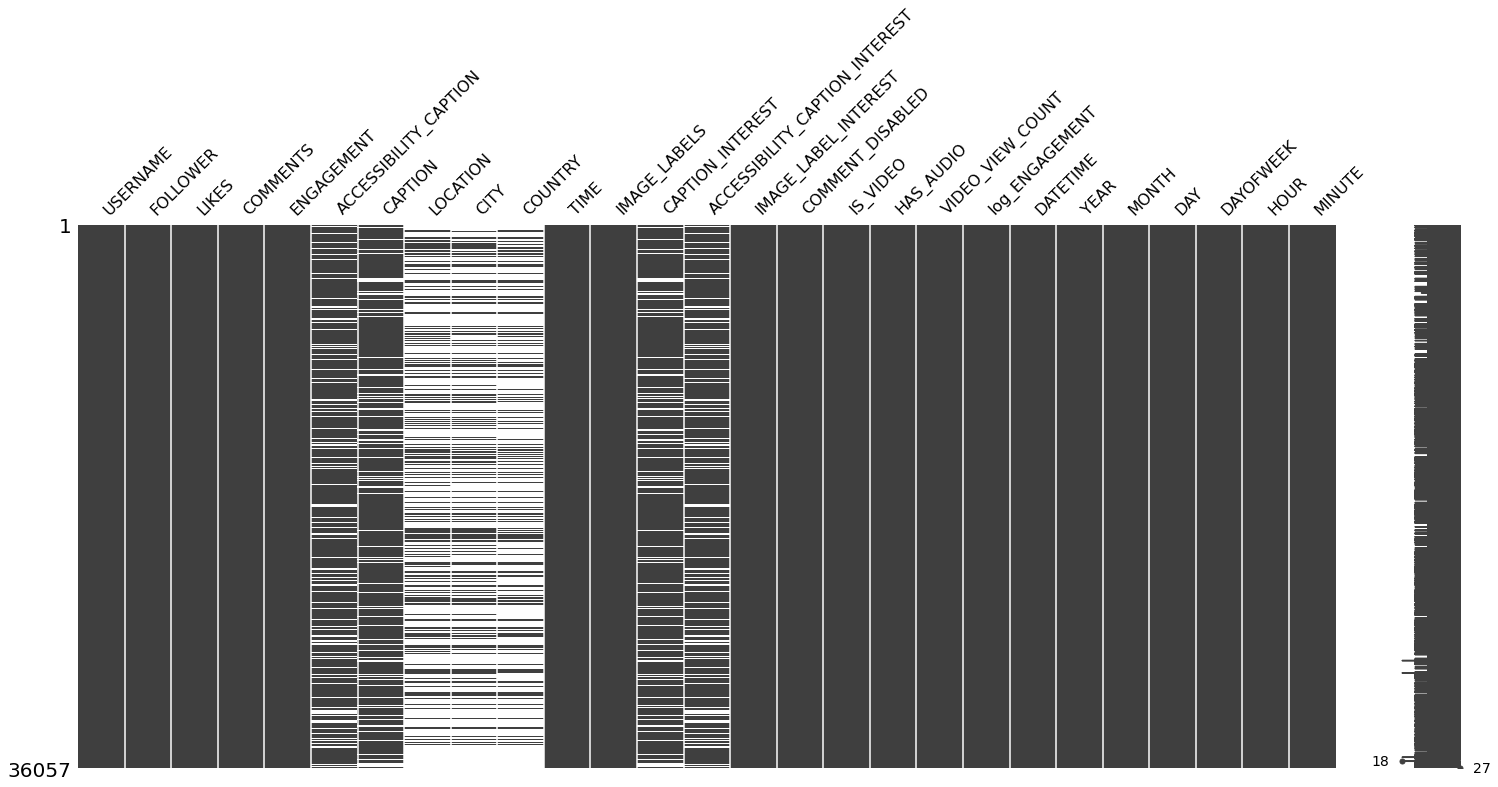

In [362]:
msno.matrix(df)

In [363]:
#https://datatofish.com/rows-with-nan-pandas-dataframe/
#len(df[df['FULLNAME'].isna()]) # 126 #849
#df[df['FULLNAME'].isnull()]
#df[df.isna().any(axis=1)] # len = 4020
# df[df.isnull().any(axis=1)]

In [364]:
for col in df.columns:
    if len(df[df[col].isnull()]) > 0:
      df[col] = df[col].fillna('Null')
      print(col)

ACCESSIBILITY_CAPTION
CAPTION
LOCATION
CITY
COUNTRY
IMAGE_LABELS
CAPTION_INTEREST
ACCESSIBILITY_CAPTION_INTEREST
IMAGE_LABEL_INTEREST


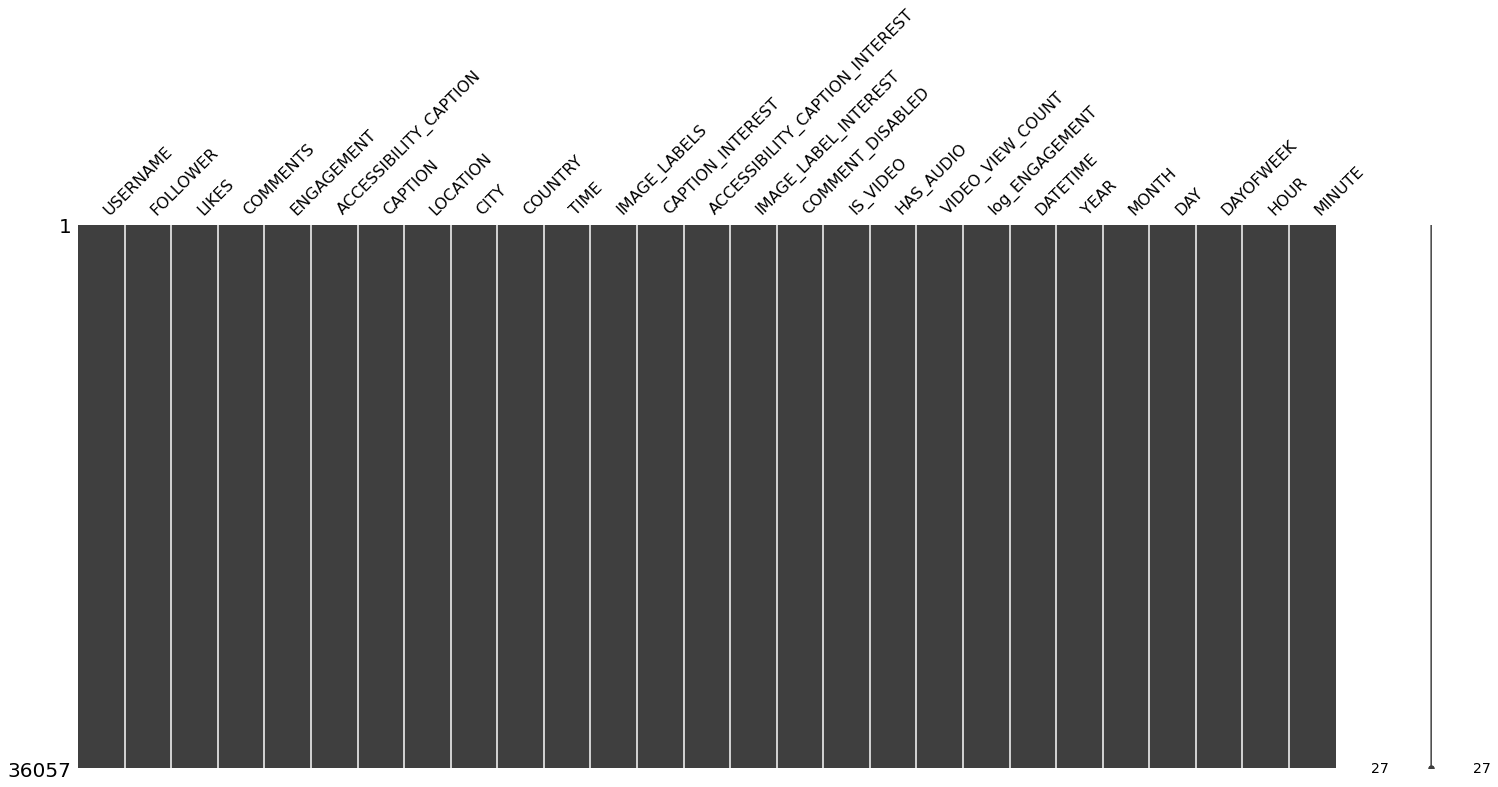

In [365]:
msno.matrix(df)

In [366]:
df.IMAGE_LABEL_INTEREST.unique()

array(['travel', 'business', 'style_fashion', 'pets', 'podcasts',
       'technology_computing', 'movies', 'education',
       'dating_and_relationships', 'sports', 'books_literature',
       'food_drink', 'arts_entertainment', 'entertainment',
       'hobbies_interests', 'music', 'events', 'parenting', 'home_garden',
       'news', 'weddings', 'health', 'politics', 'Null',
       'cars_motorcycles', 'fitness', 'chef', 'humor', 'gaming', 'legal',
       'comic_books', 'accessories', 'baking_cooking', 'desserts_baking',
       'green_living', 'finance', 'barbecues_grilling'], dtype=object)

In [367]:
df.IMAGE_LABEL_INTEREST.value_counts()

style_fashion               13777
travel                       4679
arts_entertainment           4330
food_drink                   2788
business                     2272
sports                        985
home_garden                   891
technology_computing          755
music                         733
pets                          624
events                        577
entertainment                 543
parenting                     511
movies                        502
books_literature              285
fitness                       279
weddings                      197
health                        182
news                          172
hobbies_interests             155
education                     127
politics                      123
dating_and_relationships       94
legal                          92
cars_motorcycles               75
podcasts                       73
gaming                         70
baking_cooking                 59
Null                           35
comic_books   

In [368]:
IMAGE_LABEL_INTEREST = df.groupby(['IMAGE_LABEL_INTEREST']).head(10)
print(IMAGE_LABEL_INTEREST)

                          USERNAME  FOLLOWER  LIKES  ...  DAYOFWEEK  HOUR MINUTE
LINE_NUM_INDEX                                       ...                        
24897              _color_pal_ette        17    959  ...          0    10     25
31286                 gigimakeup25       157     30  ...          5    20     42
37738               bingham.daniel       285   3825  ...          0    14     44
26000                 syed_zehra01       357   3321  ...          1    23     17
25853            tiger.tiger1tiger        42    250  ...          1     8      4
...                            ...       ...    ...  ...        ...   ...    ...
24055           ruby_jadecreations       409      2  ...          5    21     48
16341                 masalamommas      3009     12  ...          1    18     27
35354             hermelindapirela       260      1  ...          2    23      6
32807                  arelismonti       617      1  ...          2    12     56
30671            secular_bha

## Create bins (buckets) of Likes, Comment Engagement so we can use a classification model

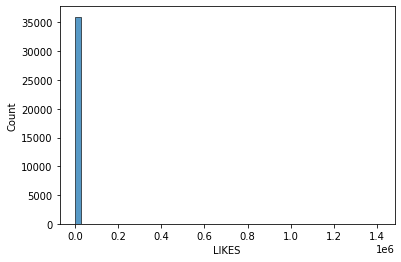

In [369]:
sns.histplot(x = df.LIKES,bins=50)

In [370]:
bins_LIKES=[min(df.LIKES)-1,15,40,200,400,max(df.LIKES)+1]
pd.cut(x=df.LIKES, bins=5).value_counts()
pd.cut(x=df.LIKES, bins=bins_LIKES, labels=bin_labels,
       ordered=True).value_counts()

High         11658
Low          11387
Medium        9208
Extreme       1981
Very High     1823
Name: LIKES, dtype: int64

In [371]:
df['LIKES_RANK'] = pd.cut(x=df.LIKES, bins=bins_LIKES, labels=bin_labels,
       ordered=True)

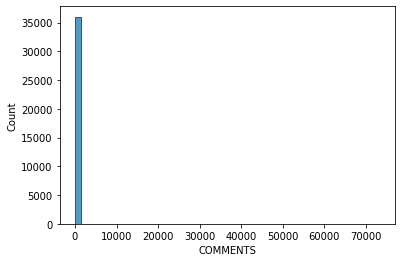

In [372]:
sns.histplot(x = df.COMMENTS,bins=50)

In [373]:
len(df.COMMENTS) #3921

36057

In [374]:
bins_COMMENTS=[min(df.COMMENTS)-1,1,5,40,60,max(df.COMMENTS)]
#pd.cut(x=df.COMMENTS, bins=5).value_counts()
pd.cut(x=df.COMMENTS, bins=bins_COMMENTS#, labels=labels 
        ,ordered=True).value_counts()

(-1, 1]        18435
(1, 5]          8534
(5, 40]         7656
(60, 73188]      828
(40, 60]         604
Name: COMMENTS, dtype: int64

In [375]:
df['COMMENTS_RANK'] = pd.cut(x=df.COMMENTS, bins=bins_COMMENTS, labels=bin_labels 
        ,ordered=True)

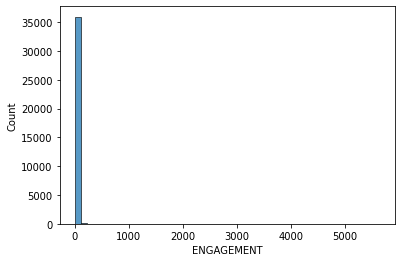

In [376]:
sns.histplot(x = df.ENGAGEMENT,bins=50)

In [377]:
bins_ENGAGEMENT=[min(df.ENGAGEMENT)-1,1.5,3.5,10,15,max(df.ENGAGEMENT)]
pd.cut(x=df.ENGAGEMENT, bins=5, labels=bin_labels, ordered=True).value_counts()
pd.cut(x=df.ENGAGEMENT, bins=bins_ENGAGEMENT, labels=bin_labels, ordered=True).value_counts()

High         11801
Low           7799
Medium        7431
Extreme       5120
Very High     3906
Name: ENGAGEMENT, dtype: int64

In [378]:
df['ENGAGEMENT_RANK'] = pd.cut(x=df.ENGAGEMENT, bins=bins_ENGAGEMENT, labels=bin_labels, ordered=True)

In [379]:
df['ENGAGEMENT_RANK']

LINE_NUM_INDEX
24897    Extreme
31286    Extreme
37738    Extreme
26000    Extreme
25853    Extreme
          ...   
37546        Low
37727        Low
37755        Low
37815        Low
37857        Low
Name: ENGAGEMENT_RANK, Length: 36057, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Extreme']

Convert Rank to Code using Dictionary 

In [380]:
df.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT',
       'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'log_ENGAGEMENT', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK',
       'HOUR', 'MINUTE', 'LIKES_RANK', 'COMMENTS_RANK', 'ENGAGEMENT_RANK'],
      dtype='object')

In [381]:
df.LIKES_RANK.unique()

['Extreme', 'Medium', 'Very High', 'High', 'Low']
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Extreme']

In [382]:
df['COMMENTS_RANK']

LINE_NUM_INDEX
24897        Low
31286    Extreme
37738       High
26000       High
25853     Medium
          ...   
37546        Low
37727        Low
37755        Low
37815        Low
37857        Low
Name: COMMENTS_RANK, Length: 36057, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Extreme']

In [383]:
map_dict_rank = {'Low':0.0 , 'Medium':1.0, 'High':2.0, 'Very High':3.0, 'Extreme':4.0}
map_dict_rank

{'Extreme': 4.0, 'High': 2.0, 'Low': 0.0, 'Medium': 1.0, 'Very High': 3.0}

In [384]:
df['LIKES_RANK_INT'] =  df['LIKES_RANK'].map(map_dict_rank).astype(int)

In [385]:
df['COMMENTS_RANK_INT'] =   df['COMMENTS_RANK'].map(map_dict_rank).astype(int)

In [386]:
df['ENGAGEMENT_RANK_INT'] =   df['ENGAGEMENT_RANK'].map(map_dict_rank).astype(int)

In [387]:
df[['LIKES_RANK','LIKES_RANK_INT']].value_counts().sort_index()

LIKES_RANK  LIKES_RANK_INT
Low         0                 11387
Medium      1                  9208
High        2                 11658
Very High   3                  1823
Extreme     4                  1981
dtype: int64

In [388]:
df[['COMMENTS_RANK','COMMENTS_RANK_INT']].value_counts().sort_index()

COMMENTS_RANK  COMMENTS_RANK_INT
Low            0                    18435
Medium         1                     8534
High           2                     7656
Very High      3                      604
Extreme        4                      828
dtype: int64

In [389]:
df[['ENGAGEMENT_RANK','ENGAGEMENT_RANK_INT']].value_counts().sort_index()

ENGAGEMENT_RANK  ENGAGEMENT_RANK_INT
Low              0                       7799
Medium           1                       7431
High             2                      11801
Very High        3                       3906
Extreme          4                       5120
dtype: int64

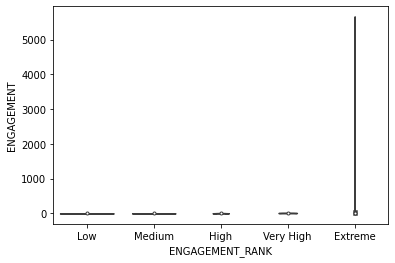

In [390]:
p = sns.violinplot(x='ENGAGEMENT_RANK', y='ENGAGEMENT', 
                    #order=cut_order, 
                    data=df)

## Eladk 28-Sep-2021, more bucketing



1.  VIDEO_VIEW_COUNT          41.148879
2.  FOLLOWER                  35.852012
3.  USERNAME_OBJECT_AS_INT    17.961764
4.  CAPTION_OBJECT_AS_INT      3.558228
5.  HOUR                       1.201713
6.  MINUTE                     0.277403



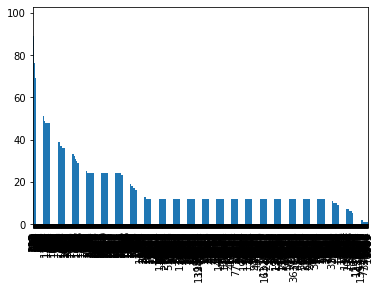

In [391]:
df.FOLLOWER.value_counts().sort_values(ascending=False).plot.bar()
#.reindex()

## Replacing Charecters  with Number uning OrdinalEncoder

In [392]:
# list of char / object columns

In [393]:
df.dtypes

USERNAME                                  object
FOLLOWER                                   int64
LIKES                                      int64
COMMENTS                                   int64
ENGAGEMENT                               float64
ACCESSIBILITY_CAPTION                     object
CAPTION                                   object
LOCATION                                  object
CITY                                      object
COUNTRY                                   object
TIME                                       int64
IMAGE_LABELS                              object
CAPTION_INTEREST                          object
ACCESSIBILITY_CAPTION_INTEREST            object
IMAGE_LABEL_INTEREST                      object
COMMENT_DISABLED                           int64
IS_VIDEO                                   int64
HAS_AUDIO                                  int64
VIDEO_VIEW_COUNT                         float64
log_ENGAGEMENT                           float64
DATETIME            

In [394]:
df.select_dtypes(include=['object']).dtypes

USERNAME                          object
ACCESSIBILITY_CAPTION             object
CAPTION                           object
LOCATION                          object
CITY                              object
COUNTRY                           object
IMAGE_LABELS                      object
CAPTION_INTEREST                  object
ACCESSIBILITY_CAPTION_INTEREST    object
IMAGE_LABEL_INTEREST              object
dtype: object

In [395]:
df.select_dtypes(include=['object']).dtypes.index

Index(['USERNAME', 'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY',
       'COUNTRY', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST'],
      dtype='object')

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 24897 to 37857
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   USERNAME                        36057 non-null  object        
 1   FOLLOWER                        36057 non-null  int64         
 2   LIKES                           36057 non-null  int64         
 3   COMMENTS                        36057 non-null  int64         
 4   ENGAGEMENT                      36057 non-null  float64       
 5   ACCESSIBILITY_CAPTION           36057 non-null  object        
 6   CAPTION                         36057 non-null  object        
 7   LOCATION                        36057 non-null  object        
 8   CITY                            36057 non-null  object        
 9   COUNTRY                         36057 non-null  object        
 10  TIME                            36057 non-null  int64         
 11

In [397]:
enc = OrdinalEncoder()

Many columns:

In [398]:
for col in df.select_dtypes(include=['object']).dtypes.index:
#for col in ['USERNAME','FULLNAME']:
  #col_list = pd.DataFrame(df[col].unique())
  #col_list.rename(columns = {0:col},inplace=True)
  #col_list.rename(columns = {0:col},inplace=True)
  enc.fit(df[[col]])
  df[col + '_OBJECT_AS_INT'] = enc.transform(df[[col]])
  #print(col)

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 24897 to 37857
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   USERNAME                                      36057 non-null  object        
 1   FOLLOWER                                      36057 non-null  int64         
 2   LIKES                                         36057 non-null  int64         
 3   COMMENTS                                      36057 non-null  int64         
 4   ENGAGEMENT                                    36057 non-null  float64       
 5   ACCESSIBILITY_CAPTION                         36057 non-null  object        
 6   CAPTION                                       36057 non-null  object        
 7   LOCATION                                      36057 non-null  object        
 8   CITY                                          36057 non-null  

In [400]:
df.head(2)

,USERNAME,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,USERNAME_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24897,_color_pal_ette,17,959,0,5641.18,Null,......(50:7)\n....\n#islam#quran#islamic#verse#quranverse#nature#subhanallah#muslim#reels#islamicreels#truth#mountains#ahmedalnufais#qiraat#reeloftheday#reelsinstagram#holyquran#mist,Null,Null,Null,1630923941,"Vegetation, Plant, Nature, Rainforest, Outdoors, Land, Tree, Weather, Fog, Jungle, Painting, Art, Mist, Woodland, Forest, Bush, Landscape, Scenery",education,Null,travel,0,1,1,1872.0,8.638026,2021-09-06 10:25:41,2021,9,6,0,10,25,Extreme,Low,Extreme,4,0,4,62.0,78.0,2081.0,2922.0,1777.0,78.0,33402.0,12.0,0.0,35.0
31286,gigimakeup25,157,30,2147,1386.62,"Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.","???????????????? ???? SORTEO ????????????\n participa Ahora y Gana \nUna Paleta de Sombras ( 32 Colores) + Set de Brochas Profesinales de ojos + OBSEQUIO Sorpresa.\n \nCómo Participar?\n???? Sigue nuestra cuenta en Instagram @gigimakeup25 \n???? Etiqueta a 3 Amigos ( No valen famosos , etc )\n???? Dejar un comentario con el hastang #quieroganar.\n\nPuedes participar hasta el 05/10/2021 Hasta las 23:59.\nEl 06/10/2021 se publicará el nombre del feliz Ganador o Ganadora.\nTe Apuntas! ,????????\nMucha Suerte",Null,Null,Null,1631392946,"Flyer, Brochure, Advertisement, Poster, Paper, Text",entertainment,style_fashion,business,0,0,0,0.0,7.235345,2021-09-11 20:42:26,2021,9,11,5,20,42,Medium,Extreme,Extreme,1,4,4,1228.0,8275.0,3283.0,2922.0,1777.0,78.0,13072.0,13.0,27.0,6.0


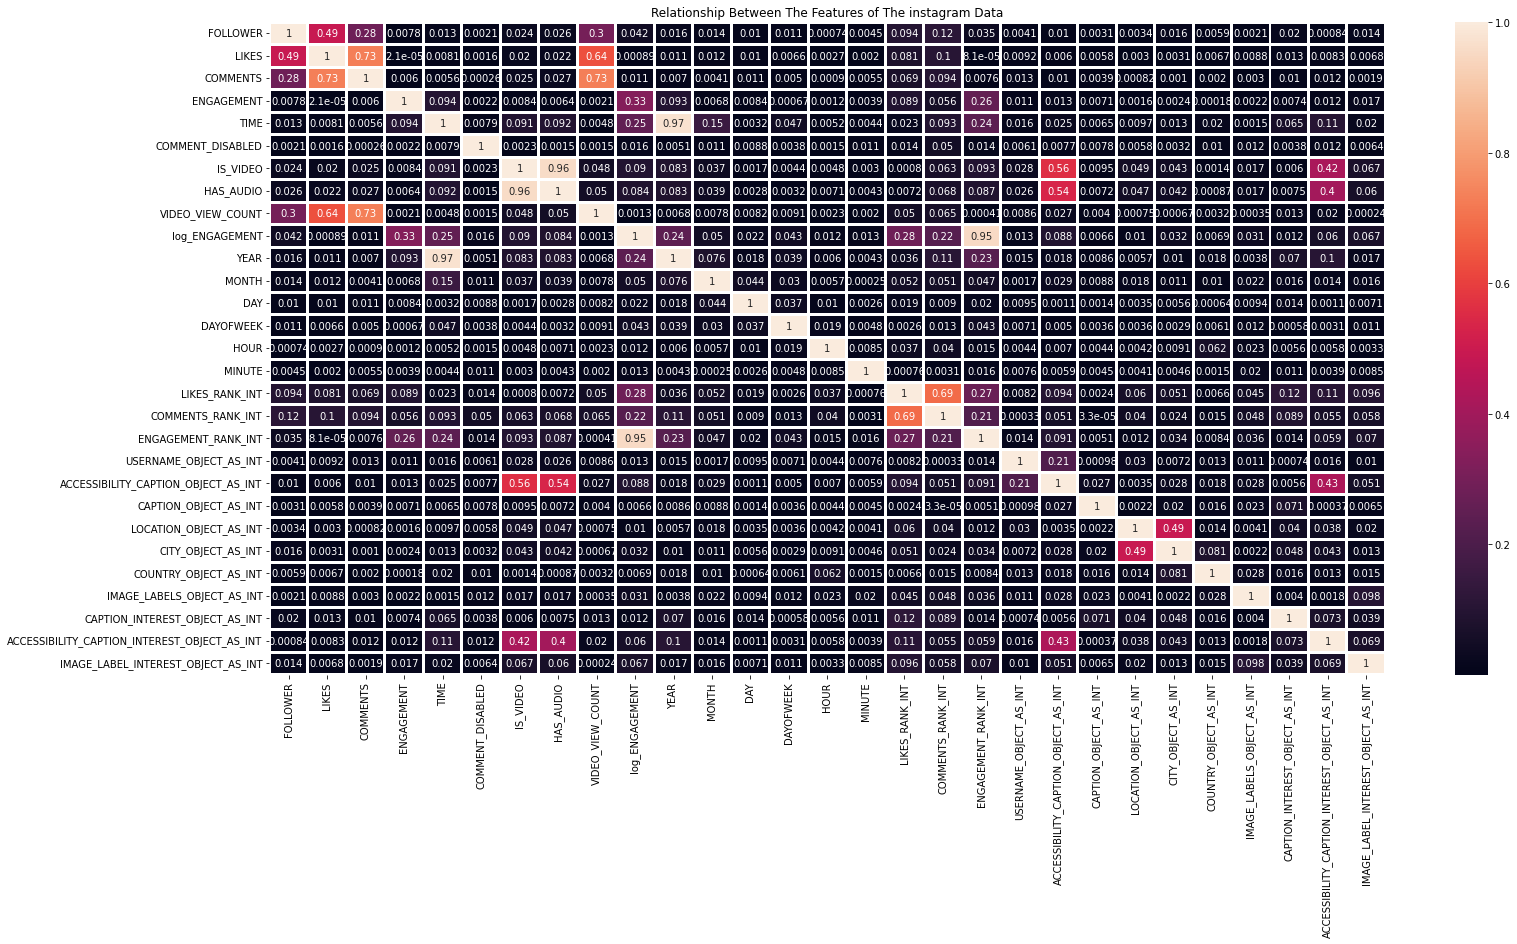

In [401]:
plt.figure(figsize=(25,12))
plt.title("Relationship Between The Features of The instagram Data")
sns.heatmap(df.corr().abs(), annot=True, linewidths = 2, linecolor = "white")

In [402]:
# %%time 
# df = df.select_dtypes(include=np.number)
# sns.pairplot(df ,height=1.8) # takes about 5 min.

## More EDA

In [403]:
df.head(2)

,USERNAME,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,USERNAME_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24897,_color_pal_ette,17,959,0,5641.18,Null,......(50:7)\n....\n#islam#quran#islamic#verse#quranverse#nature#subhanallah#muslim#reels#islamicreels#truth#mountains#ahmedalnufais#qiraat#reeloftheday#reelsinstagram#holyquran#mist,Null,Null,Null,1630923941,"Vegetation, Plant, Nature, Rainforest, Outdoors, Land, Tree, Weather, Fog, Jungle, Painting, Art, Mist, Woodland, Forest, Bush, Landscape, Scenery",education,Null,travel,0,1,1,1872.0,8.638026,2021-09-06 10:25:41,2021,9,6,0,10,25,Extreme,Low,Extreme,4,0,4,62.0,78.0,2081.0,2922.0,1777.0,78.0,33402.0,12.0,0.0,35.0
31286,gigimakeup25,157,30,2147,1386.62,"Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.","???????????????? ???? SORTEO ????????????\n participa Ahora y Gana \nUna Paleta de Sombras ( 32 Colores) + Set de Brochas Profesinales de ojos + OBSEQUIO Sorpresa.\n \nCómo Participar?\n???? Sigue nuestra cuenta en Instagram @gigimakeup25 \n???? Etiqueta a 3 Amigos ( No valen famosos , etc )\n???? Dejar un comentario con el hastang #quieroganar.\n\nPuedes participar hasta el 05/10/2021 Hasta las 23:59.\nEl 06/10/2021 se publicará el nombre del feliz Ganador o Ganadora.\nTe Apuntas! ,????????\nMucha Suerte",Null,Null,Null,1631392946,"Flyer, Brochure, Advertisement, Poster, Paper, Text",entertainment,style_fashion,business,0,0,0,0.0,7.235345,2021-09-11 20:42:26,2021,9,11,5,20,42,Medium,Extreme,Extreme,1,4,4,1228.0,8275.0,3283.0,2922.0,1777.0,78.0,13072.0,13.0,27.0,6.0


## Feature Engneering

## Image captioning

Eladk 2021-Sep-17, we need to:


*   convert y colum to 5 classes so we can have a classification problem and not a regresion model
*   check if the data is inbalance (so we need to use stratify)



# Split the Data

select only int and float column types to X 
seletc LIKES, COMMENTS, ENGAGEMENT as y

In [404]:
df.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT',
       'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'log_ENGAGEMENT', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK',
       'HOUR', 'MINUTE', 'LIKES_RANK', 'COMMENTS_RANK', 'ENGAGEMENT_RANK',
       'LIKES_RANK_INT', 'COMMENTS_RANK_INT', 'ENGAGEMENT_RANK_INT',
       'USERNAME_OBJECT_AS_INT', 'ACCESSIBILITY_CAPTION_OBJECT_AS_INT',
       'CAPTION_OBJECT_AS_INT', 'LOCATION_OBJECT_AS_INT', 'CITY_OBJECT_AS_INT',
       'COUNTRY_OBJECT_AS_INT', 'IMAGE_LABELS_OBJECT_AS_INT',
       'CAPTION_INTEREST_OBJECT_AS_INT',
       'ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT',
       'IMAGE_LABEL_INTEREST_OBJECT_AS_INT'],
      dtype='object')

In [405]:
X = df.select_dtypes(include=['number'])
X.drop(['LIKES','COMMENTS','ENGAGEMENT','log_ENGAGEMENT'], axis=1, inplace=True) #['LIKES','COMMENTS','ENGAGEMENT']

In [406]:
X.drop(['LIKES_RANK_INT','COMMENTS_RANK_INT','ENGAGEMENT_RANK_INT'], axis=1, inplace=True) #['LIKES','COMMENTS','ENGAGEMENT']

In [407]:
y = df['ENGAGEMENT']
y1 = df['LIKES']
y2 = df['COMMENTS']
y3 = df['log_ENGAGEMENT']
y_ENGAGEMENT_RANK_INT = df['ENGAGEMENT_RANK_INT']
y_LIKES_RANK_INT = df['LIKES_RANK_INT']
y_COMMENTS_RANK_INT = df['COMMENTS_RANK_INT']

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, train_size = train_size\
                           , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [409]:
print('Training Features Shape:', X_train.shape)
print('Training Labels (y) Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels(y) Shape:', y_test.shape)

Training Features Shape: (27042, 22)
Training Labels (y) Shape: (27042,)
Testing Features Shape: (9015, 22)
Testing Labels(y) Shape: (9015,)


# Mechine Learning  Model

## Appling First1 Model - KNN model

In [410]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = (mse(y_test,pred))**0.5 #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.1289284615983242
RMSE value for k=  2 is: 1.0010129871270375
RMSE value for k=  3 is: 0.9530572132636638
RMSE value for k=  4 is: 0.9318006797466104
RMSE value for k=  5 is: 0.9178511163914955
RMSE value for k=  6 is: 0.9101573843408299
RMSE value for k=  7 is: 0.9050384093239091
RMSE value for k=  8 is: 0.9019131737488579
RMSE value for k=  9 is: 0.8984465311580712
RMSE value for k=  10 is: 0.8962743300061391
RMSE value for k=  11 is: 0.8954346551991301
RMSE value for k=  12 is: 0.8938850395371634
RMSE value for k=  13 is: 0.8916175365144972
RMSE value for k=  14 is: 0.8896892716061208
RMSE value for k=  15 is: 0.8886374474693054
RMSE value for k=  16 is: 0.8872733854554401
RMSE value for k=  17 is: 0.8876402434310294
RMSE value for k=  18 is: 0.8873035835705441
RMSE value for k=  19 is: 0.8871904769730858
RMSE value for k=  20 is: 0.8878875061904241
RMSE value for k=  21 is: 0.8880068186053717
RMSE value for k=  22 is: 0.888463976148116
RMSE value for k=  2

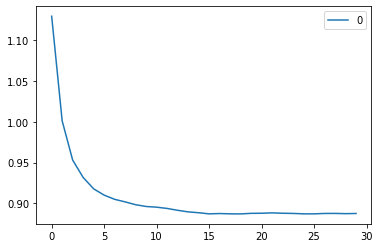

In [411]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [412]:
min_mse_k = min(rmse_val)
min_index = rmse_val.index(min_mse_k)
print(min_index, min_mse_k)

18 0.8871904769730858


In [413]:
neighbor = min_index
knn_model_1 = KNeighborsRegressor(n_neighbors=neighbor).fit(X_train, y_train)

In [414]:
y_train_pred = knn_model_1.predict(X_train)

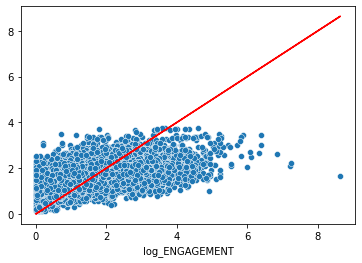

In [415]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [416]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_train[-150:]))), y=y_train[-150:],
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_train_pred[-150:]))), y=y_train_pred[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

## Validating the Model 

In [417]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

0.8361458728651001

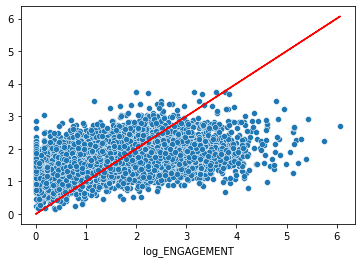

In [418]:
y_test_pred = knn_model_1.predict(X_test)
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')

In [419]:
RMSE = mse(y_test, y_test_pred)**0.5
print('RMSE ', RMSE)

print('r2_score: ', round(r2_score(y_test, y_test_pred)*100, 2))

RMSE  0.8873035835705441
r2_score:  12.78


## Scaled MaxAbsScaler model

In [420]:
my_scaler = MaxAbsScaler().fit(X_train)
X_train_scaled = pd.DataFrame(my_scaler.transform(X_train), columns=X_train.columns)
X_train_scaled.head()

,FOLLOWER,TIME,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,USERNAME_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
0,0.000011,0.999617,0.0,0.0,0.0,0.0,1.0,0.750000,0.483871,0.333333,0.608696,0.593220,0.734805,0.912152,0.461159,0.600123,0.650439,0.65,0.140367,0.055556,0.466667,0.916667
1,0.000011,0.990244,0.0,0.0,0.0,0.0,1.0,0.250000,0.709677,0.000000,0.521739,0.457627,0.092890,0.179513,0.609483,0.600123,0.650439,0.65,0.040138,0.000000,0.733333,0.916667
2,0.000012,0.992106,0.0,0.0,0.0,0.0,1.0,0.333333,0.838710,0.000000,0.695652,0.644068,0.575401,0.446624,0.197812,0.299856,0.324305,0.95,0.953308,0.055556,0.966667,0.166667
3,0.000003,0.995018,0.0,0.0,0.0,0.0,1.0,0.500000,0.645161,1.000000,0.739130,0.186441,0.733658,0.204159,0.426338,0.600123,0.650439,0.65,0.415591,0.972222,0.066667,0.611111
4,0.000008,0.987675,0.0,0.0,0.0,0.0,1.0,0.166667,0.032258,0.000000,1.000000,0.423729,0.107798,0.046225,0.609483,0.600123,0.650439,0.65,0.267191,0.000000,0.066667,0.916667


In [421]:
knn_model_2 = KNeighborsRegressor(n_neighbors=10).fit(X_train_scaled, y_train)

In [422]:
y_train_pred = knn_model_2.predict(X_train_scaled)

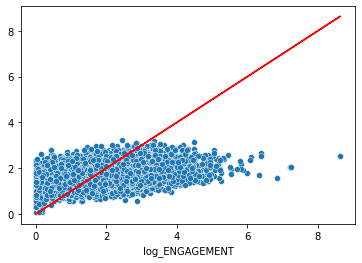

In [423]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [424]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

0.8546486733105517

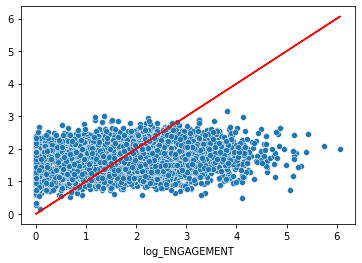

In [425]:
X_test_scaled = my_scaler.transform(X_test)
y_test_pred = knn_model_2.predict(X_test_scaled)

ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')

In [426]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

0.9515915144105195

## Appling 2nd Model - Decision Tree with bins

In [427]:
model_2_dt = DecisionTreeClassifier(
    min_samples_leaf=3
    ,max_depth=5
    )

In [428]:
model_2_dt.fit(X, 
              y_ENGAGEMENT_RANK_INT)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [429]:
class_list = [str(x) for x in model_2_dt.classes_]
class_list

['0', '1', '2', '3', '4']

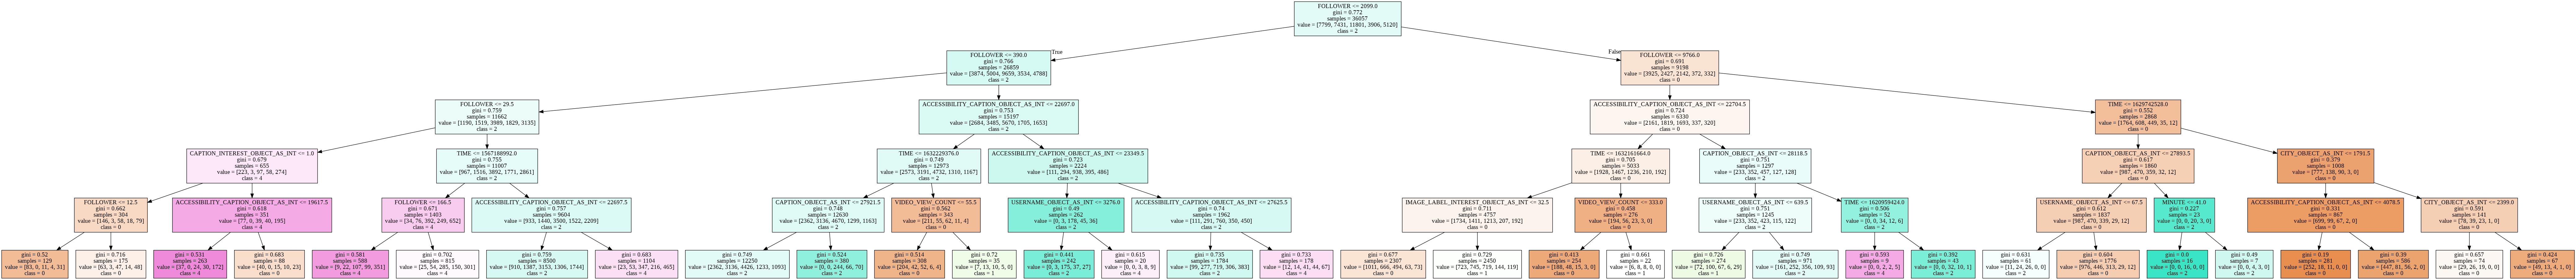

In [430]:
dot_data = StringIO()  
export_graphviz(model_2_dt, out_file=dot_data, feature_names=X.columns, 
                leaves_parallel=True, filled=True, class_names=[str(x) for x in model_2_dt.classes_])
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=1000) 

View Features Emportance:

In [431]:
pd.Series(model_2_dt.feature_importances_*100,
          index=X.columns).sort_values(ascending=False).round()

FOLLOWER                                        65.0
ACCESSIBILITY_CAPTION_OBJECT_AS_INT             13.0
TIME                                            12.0
CAPTION_OBJECT_AS_INT                            4.0
IMAGE_LABEL_INTEREST_OBJECT_AS_INT               1.0
USERNAME_OBJECT_AS_INT                           1.0
CAPTION_INTEREST_OBJECT_AS_INT                   1.0
CITY_OBJECT_AS_INT                               1.0
VIDEO_VIEW_COUNT                                 1.0
MINUTE                                           0.0
YEAR                                             0.0
COMMENT_DISABLED                                 0.0
IS_VIDEO                                         0.0
HAS_AUDIO                                        0.0
DAY                                              0.0
MONTH                                            0.0
LOCATION_OBJECT_AS_INT                           0.0
DAYOFWEEK                                        0.0
ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT  

Eladk 2021-Sep-24 comment in first model:

*   Why Time is So meaning full?
*   What ACCESSIBILITY_CAPTION have corolation with ranking?
*   I Need to understand why folloer is very meaningfull
*   I Need to understand why USERNAME,userid is very meaningfull

In [432]:
df.head(3)

,USERNAME,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,USERNAME_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24897,_color_pal_ette,17,959,0,5641.18,Null,......(50:7)\n....\n#islam#quran#islamic#verse#quranverse#nature#subhanallah#muslim#reels#islamicreels#truth#mountains#ahmedalnufais#qiraat#reeloftheday#reelsinstagram#holyquran#mist,Null,Null,Null,1630923941,"Vegetation, Plant, Nature, Rainforest, Outdoors, Land, Tree, Weather, Fog, Jungle, Painting, Art, Mist, Woodland, Forest, Bush, Landscape, Scenery",education,Null,travel,0,1,1,1872.0,8.638026,2021-09-06 10:25:41,2021,9,6,0,10,25,Extreme,Low,Extreme,4,0,4,62.0,78.0,2081.0,2922.0,1777.0,78.0,33402.0,12.0,0.0,35.0
31286,gigimakeup25,157,30,2147,1386.62,"Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.","???????????????? ???? SORTEO ????????????\n participa Ahora y Gana \nUna Paleta de Sombras ( 32 Colores) + Set de Brochas Profesinales de ojos + OBSEQUIO Sorpresa.\n \nCómo Participar?\n???? Sigue nuestra cuenta en Instagram @gigimakeup25 \n???? Etiqueta a 3 Amigos ( No valen famosos , etc )\n???? Dejar un comentario con el hastang #quieroganar.\n\nPuedes participar hasta el 05/10/2021 Hasta las 23:59.\nEl 06/10/2021 se publicará el nombre del feliz Ganador o Ganadora.\nTe Apuntas! ,????????\nMucha Suerte",Null,Null,Null,1631392946,"Flyer, Brochure, Advertisement, Poster, Paper, Text",entertainment,style_fashion,business,0,0,0,0.0,7.235345,2021-09-11 20:42:26,2021,9,11,5,20,42,Medium,Extreme,Extreme,1,4,4,1228.0,8275.0,3283.0,2922.0,1777.0,78.0,13072.0,13.0,27.0,6.0
37738,bingham.daniel,285,3825,9,1345.26,Null,@doug_44mtb @james_bettess,Null,Null,Null,1628520240,"Path, Person, Human, Wood, Vegetation, Plant, Nature, Trail, Transportation, Tree",education,Null,travel,0,1,1,64971.0,7.205086,2021-08-09 14:44:00,2021,8,9,0,14,44,Extreme,High,Extreme,4,2,4,516.0,78.0,4227.0,2922.0,1777.0,78.0,18928.0,12.0,0.0,35.0


In [433]:
df['ENGAGEMENT_RANK_INT_pred'] = model_2_dt.predict(X)
df.head(3)

,USERNAME,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,USERNAME_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT,ENGAGEMENT_RANK_INT_pred
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24897,_color_pal_ette,17,959,0,5641.18,Null,......(50:7)\n....\n#islam#quran#islamic#verse#quranverse#nature#subhanallah#muslim#reels#islamicreels#truth#mountains#ahmedalnufais#qiraat#reeloftheday#reelsinstagram#holyquran#mist,Null,Null,Null,1630923941,"Vegetation, Plant, Nature, Rainforest, Outdoors, Land, Tree, Weather, Fog, Jungle, Painting, Art, Mist, Woodland, Forest, Bush, Landscape, Scenery",education,Null,travel,0,1,1,1872.0,8.638026,2021-09-06 10:25:41,2021,9,6,0,10,25,Extreme,Low,Extreme,4,0,4,62.0,78.0,2081.0,2922.0,1777.0,78.0,33402.0,12.0,0.0,35.0,4
31286,gigimakeup25,157,30,2147,1386.62,"Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.","???????????????? ???? SORTEO ????????????\n participa Ahora y Gana \nUna Paleta de Sombras ( 32 Colores) + Set de Brochas Profesinales de ojos + OBSEQUIO Sorpresa.\n \nCómo Participar?\n???? Sigue nuestra cuenta en Instagram @gigimakeup25 \n???? Etiqueta a 3 Amigos ( No valen famosos , etc )\n???? Dejar un comentario con el hastang #quieroganar.\n\nPuedes participar hasta el 05/10/2021 Hasta las 23:59.\nEl 06/10/2021 se publicará el nombre del feliz Ganador o Ganadora.\nTe Apuntas! ,????????\nMucha Suerte",Null,Null,Null,1631392946,"Flyer, Brochure, Advertisement, Poster, Paper, Text",entertainment,style_fashion,business,0,0,0,0.0,7.235345,2021-09-11 20:42:26,2021,9,11,5,20,42,Medium,Extreme,Extreme,1,4,4,1228.0,8275.0,3283.0,2922.0,1777.0,78.0,13072.0,13.0,27.0,6.0,2
37738,bingham.daniel,285,3825,9,1345.26,Null,@doug_44mtb @james_bettess,Null,Null,Null,1628520240,"Path, Person, Human, Wood, Vegetation, Plant, Nature, Trail, Transportation, Tree",education,Null,travel,0,1,1,64971.0,7.205086,2021-08-09 14:44:00,2021,8,9,0,14,44,Extreme,High,Extreme,4,2,4,516.0,78.0,4227.0,2922.0,1777.0,78.0,18928.0,12.0,0.0,35.0,2


In [434]:
s = pd.Series(model_2_dt.feature_importances_*100,
          index=X.columns).sort_values(ascending=False)

s[s.gt(0)]

FOLLOWER                               64.997435
ACCESSIBILITY_CAPTION_OBJECT_AS_INT    13.271077
TIME                                   11.755232
CAPTION_OBJECT_AS_INT                   4.438576
IMAGE_LABEL_INTEREST_OBJECT_AS_INT      1.450897
USERNAME_OBJECT_AS_INT                  1.363373
CAPTION_INTEREST_OBJECT_AS_INT          1.159620
CITY_OBJECT_AS_INT                      0.783553
VIDEO_VIEW_COUNT                        0.703038
MINUTE                                  0.077201
dtype: float64

In [435]:
# map_dict_ENGAGEMENT = dict(zip(df.ENGAGEMENT_RANK_INT,df.ENGAGEMENT_RANK))
# map_dict_ENGAGEMENT

In [436]:
#df['ENGAGEMENT_RANK_pred'] = df['ENGAGEMENT_RANK_INT_pred'].map(map_dict_ENGAGEMENT)

Evanuating the Model:

In [437]:
#type(df[['ENGAGEMENT_RANK','ENGAGEMENT_RANK_pred']].value_counts())

In [438]:
df[['ENGAGEMENT_RANK_INT','ENGAGEMENT_RANK_INT_pred']].value_counts().sort_index()

ENGAGEMENT_RANK_INT  ENGAGEMENT_RANK_INT_pred
0                    0                           3342
                     1                            808
                     2                           3543
                     4                            106
1                    0                           1343
                     1                            866
                     2                           5079
                     4                            143
2                    0                           1037
                     1                            804
                     2                           9151
                     4                            809
3                    0                            132
                     1                            155
                     2                           3070
                     4                            549
4                    0                            191
                     1              

In [439]:
#df[['ENGAGEMENT_RANK','ENGAGEMENT_RANK_pred']].value_counts().sort_index()

In [440]:
cm = confusion_matrix(y_true=df.ENGAGEMENT_RANK_INT,
                      y_pred=df.ENGAGEMENT_RANK_INT_pred)
pd.DataFrame(cm,
             index=model_2_dt.classes_,
             columns=model_2_dt.classes_)

,0,1,2,3,4
0,3342,808,3543,0,106
1,1343,866,5079,0,143
2,1037,804,9151,0,809
3,132,155,3070,0,549
4,191,148,3411,0,1370


In [441]:
print(classification_report(y_true=df.ENGAGEMENT_RANK_INT,
                      y_pred=df.ENGAGEMENT_RANK_INT_pred))

              precision    recall  f1-score   support

           0       0.55      0.43      0.48      7799
           1       0.31      0.12      0.17      7431
           2       0.38      0.78      0.51     11801
           3       0.00      0.00      0.00      3906
           4       0.46      0.27      0.34      5120

    accuracy                           0.41     36057
   macro avg       0.34      0.32      0.30     36057
weighted avg       0.37      0.41      0.35     36057



In [442]:
accuracy_score(y_true=df.ENGAGEMENT_RANK_INT, y_pred=df.ENGAGEMENT_RANK_INT_pred)

0.4084921097151732

In [443]:
s = pd.Series(model_2_dt.feature_importances_*100,
          index=X.columns).sort_values(ascending=False)

s[s.gt(0)]

FOLLOWER                               64.997435
ACCESSIBILITY_CAPTION_OBJECT_AS_INT    13.271077
TIME                                   11.755232
CAPTION_OBJECT_AS_INT                   4.438576
IMAGE_LABEL_INTEREST_OBJECT_AS_INT      1.450897
USERNAME_OBJECT_AS_INT                  1.363373
CAPTION_INTEREST_OBJECT_AS_INT          1.159620
CITY_OBJECT_AS_INT                      0.783553
VIDEO_VIEW_COUNT                        0.703038
MINUTE                                  0.077201
dtype: float64

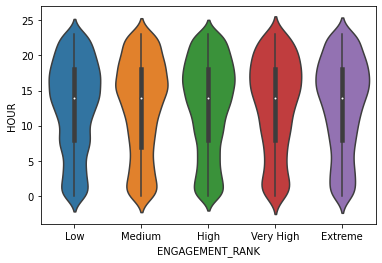

In [444]:
p = sns.violinplot(x='ENGAGEMENT_RANK', y='HOUR', 
                    #order=cut_order, 
                    data=df)

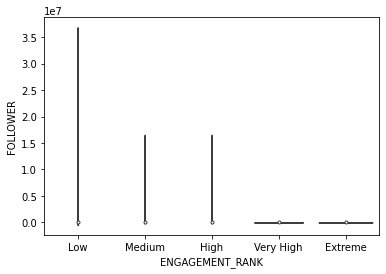

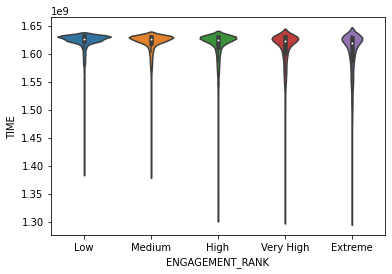

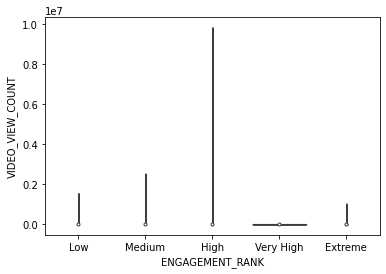

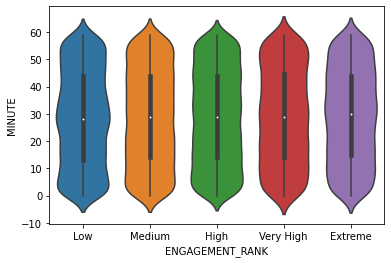

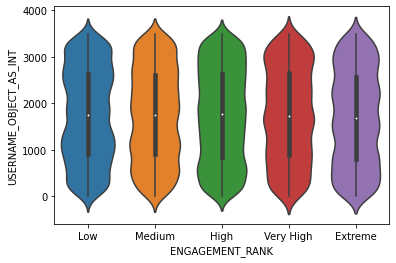

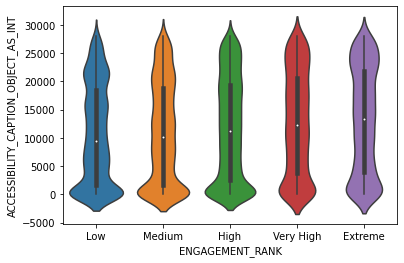

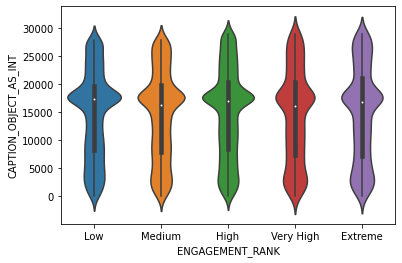

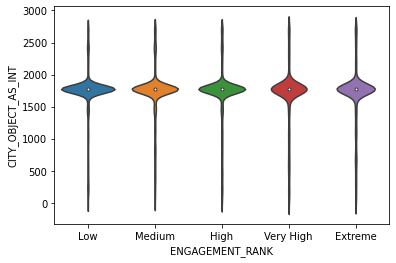

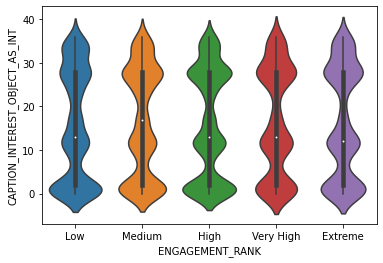

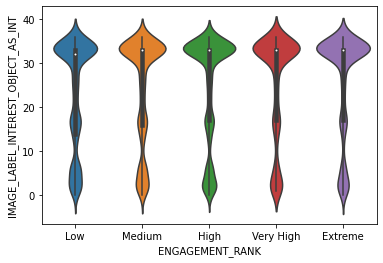

In [445]:
for index, val in pd.Series(model_2_dt.feature_importances_*100,index=X.columns).iteritems():
  if val > 0:
    plt.figure()
    p = sns.violinplot(x='ENGAGEMENT_RANK', y=index, 
                    #order=cut_order, 
                    data=df)
    

## Scoring 

## Appling 3nd Model - Random Forest regression

In [446]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = rand_state)
# Train the model on training data
rf.fit(X_train, y_train);

In [447]:
# Use the forest's predict method on the test data
rf_predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'log_of_enegament.')

Mean Absolute Error: 0.44 log_of_enegament.


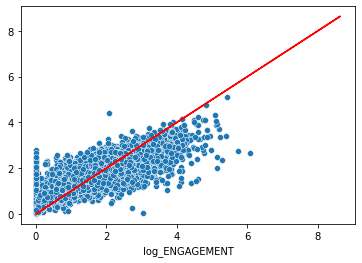

In [448]:
ax = sns.scatterplot(x=y_test, y=rf_predictions)
ax.plot(y_train, y_train, 'r')

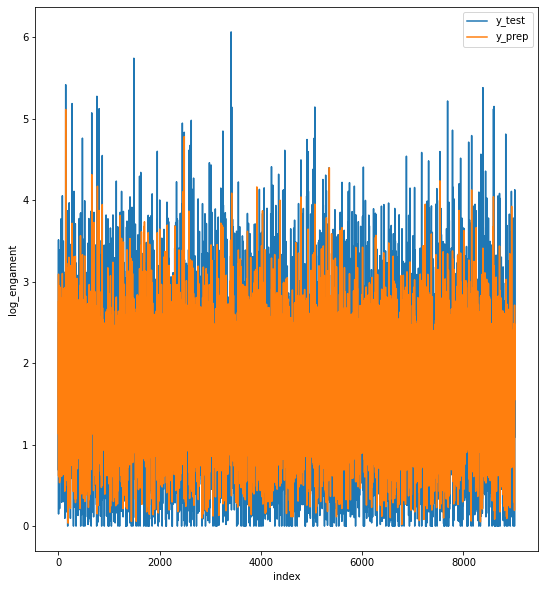

In [449]:
x = np.linspace(0, len(y_test), len(y_test))
fig = plt.figure(figsize=(9, 10))
plt.plot(x, y_test, label='y_test')
plt.plot(x, rf_predictions, label='y_prep')
plt.xlabel('index')
plt.ylabel('log_engament')
plt.legend()
plt.show()

In [450]:
rf_y_train_pred = rf.predict(X_train)
RMSE = mse(y_train, rf_y_train_pred)**0.5
RMSE

0.216228565787857

In [451]:
rf_y_test_pred = rf.predict(X_test)
RMSE = mse(y_test, rf_y_test_pred)**0.5
RMSE


0.5834812579266138

In [452]:
pd.Series(rf.feature_importances_, index=X_train.columns).\
sort_values(ascending=False)

FOLLOWER                                        0.283682
TIME                                            0.114206
ACCESSIBILITY_CAPTION_OBJECT_AS_INT             0.109844
USERNAME_OBJECT_AS_INT                          0.082382
IMAGE_LABELS_OBJECT_AS_INT                      0.048301
CAPTION_OBJECT_AS_INT                           0.046990
CAPTION_INTEREST_OBJECT_AS_INT                  0.041084
VIDEO_VIEW_COUNT                                0.037226
MINUTE                                          0.034710
HOUR                                            0.034402
DAY                                             0.029671
IMAGE_LABEL_INTEREST_OBJECT_AS_INT              0.028195
ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT    0.019618
LOCATION_OBJECT_AS_INT                          0.019566
CITY_OBJECT_AS_INT                              0.019265
DAYOFWEEK                                       0.017334
MONTH                                           0.016217
COUNTRY_OBJECT_AS_INT          

In [453]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 990,
 'verbose': 0,
 'warm_start': False}


In [454]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [455]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
#Model Performance
#Average Error: 3.6561 degrees.
#Accuracy = 93.83%.
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
#Improvement of 0.50%.

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 19.6min


In [ ]:
grid_search.best_params_

## Appling 4nd Model - Random Forest Classification 

In [ ]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y_ENGAGEMENT_RANK_INT, train_size = train_size\
                           , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [ ]:
X_train_4.drop(columns='VIDEO_VIEW_COUNT', inplace=True)
X_test_4.drop(columns='VIDEO_VIEW_COUNT', inplace=True)

In [ ]:
X_train_4.columns

In [ ]:
model_rf_4 = RandomForestClassifier()

model_rf_4.fit(X_train_4,y_train_4) # X_test_4 is Engagment_rank
preds= model_rf_4.predict_proba(X_train_4)[:,1]

#roc_auc_score(y_test_4,preds)

In [ ]:
# map_dict_ENGAGEMENT = dict(zip(df.ENGAGEMENT_RANK_INT,df.ENGAGEMENT_RANK))

In [ ]:
pd.Series(model_rf_4.feature_importances_*100, index=X_train_4.columns).sort_values(ascending=False).round()#.plot.barh(figsize=(14,12))

In [ ]:
from sklearn import tree

In [ ]:
import six

In [ ]:
_ = tree.plot_tree(model_rf_4.estimators_[0], feature_names=X_train_4.columns, filled=True)

In [ ]:
X_train_4.columns

In [ ]:
X_train_4.head(3)

In [ ]:
X_train_4['y_ENGAGEMENT_RANK_INT_pred_rf'] = model_rf_4.predict(X_train_4)

In [ ]:
X_train_4.head(3)

In [ ]:
X_train_4 = pd.concat([X_train_4, y_train_4], axis=1).reset_index()

In [ ]:
X_train_4.head(3)

In [ ]:
print(len(X_train_4))

In [ ]:
len(X_train_4[X_train_4.y_ENGAGEMENT_RANK_INT_pred_rf == X_train_4.ENGAGEMENT_RANK_INT])

In [ ]:
cm = confusion_matrix(y_true=y_train_4,
                      y_pred=X_train_4['y_ENGAGEMENT_RANK_INT_pred_rf'])
pd.DataFrame(cm,
             index=model_rf_4.classes_,
             columns=model_rf_4.classes_)

In [ ]:
X_train_4.columns

In [ ]:
print(classification_report(y_true=y_train_4,
                      y_pred=X_train_4.y_ENGAGEMENT_RANK_INT_pred_rf))

**WTF!!!**

In [ ]:
print(classification_report(y_true=df.ENGAGEMENT_RANK_INT,
                      y_pred=df.ENGAGEMENT_RANK_INT_pred))

In [ ]:
X_test_4.columns

In [ ]:
X_test_4.head(3)

In [ ]:
X_test_4['y_ENGAGEMENT_RANK_INT_pred'] = model_rf_4.predict(X_test_4)

In [ ]:
X_test_4.head(3)

In [ ]:
#pd.concat([X_test_4, df4.reindex(df1.index)], axis=1)
X_test_4 = pd.concat([X_test_4, y_test_4], axis=1).reindex(X_test_4.index)

In [ ]:
X_test_4.head(3)

In [ ]:
X_test_4[['ENGAGEMENT_RANK_INT','y_ENGAGEMENT_RANK_INT_pred']].value_counts().sort_index()

In [ ]:
cm = confusion_matrix(y_true=X_test_4.ENGAGEMENT_RANK_INT,
                      y_pred=X_test_4.y_ENGAGEMENT_RANK_INT_pred)
pd.DataFrame(cm,
             index=model_2_dt.classes_,
             columns=model_2_dt.classes_)

In [ ]:
print(classification_report(y_test_4,
                      y_pred=X_test_4.y_ENGAGEMENT_RANK_INT_pred))

Visualize the Random Forest:

In [ ]:
# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in model_rf_4.estimators_:
#   if (i_tree <1):        
#       export_graphviz(model_rf_4,
#                   feature_names=X_train_4.columns,
#                   filled=True,
#                   rounded=True)
#       pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
#       i_tree = i_tree + 1

## Appling 4nd Model - XGBoost regression


In [ ]:
XGB_reg = xgb.XGBRegressor()

In [ ]:
print(XGB_reg)

In [ ]:
XGB_reg.fit(X_train, y_train)

In [ ]:
score = XGB_reg.score(X_train, y_train)  
print("Training score: ", score)

In [ ]:
scores = cross_val_score(XGB_reg, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
y_test_pred = XGB_reg.predict(X_test)
mse = mse(y_test, y_test_pred)
score_test = XGB_reg.score(X_test, y_test)  
print("Training score: ", score_test)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**0.5))


In [ ]:
x_ax = range(len(y_test))
fig = plt.figure(figsize=(9, 10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [ ]:
XGB_param_grid = {'colsample_bytree': [0.3, 0.7, 1.0, 1.2],
    'n_estimators': [50,100,200],    'max_depth': [2,3,4]
}
XGB_reg_grid = xgb.XGBRegressor()
grid_mse = GridSearchCV(param_grid=XGB_param_grid, estimator=XGB_reg_grid, 
                        scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X, y)
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))